# Analiza sportowa - Analiza Danych
## Projekt realizowany w ramach przedmiotu: Metody Przetwarzania Dużych Ilości Danych
### Grupa projektowa:
+  Filip Kozak
+  Maciej Grzela
+  Paweł Owczarek
+  Szymon Tusznio

### Import bibliotek oraz konfiguracja
***
Zaimportowanie wykorzystywanych bibliotek oraz konfiguracja sposobu wyświetlania zbiorów danych dla biblioteki Pandas

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import seaborn as sns
from IPython.display import display, HTML
import statistics
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 320)
pd.reset_option("display.max_rows")

css = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(css))

### Załadowanie zbioru danych
***
Wczytanie danych z pliku csv oraz zapisanie ich do struktury DataFrame dostępnej w ramach biblioteki Pandas
Do kolumny data transferu (__TransferDate__) przypisano typ pandas datetime
Wszystkie wartości nieokreślone (tj. wartości puste powstałe w wyniku czyszczenia danych [intencjonalnie], które mogą być interpretowane przez pandas jako NA zamieniane są na puste ciągi znaków)

In [2]:
transfer_df = pd.read_csv(
    'csv/transfers-data-frame-cleared.csv',
    sep=',',
    header=0,
    index_col=0,
    parse_dates=['TransferDate']
)

transfer_df = transfer_df.fillna("")

### Wyświetlenie szczegółów dotyczących zbioru danych
***
Analizowany zbiór danych składa się z 17630 wierszy oraz 30 kolumn. Dla każdej z kolumn, wszystkie wartości są typu not-null. Większość danych zawartych w ramach zbioru jest typu liczbowego (int64 oraz float64). Ponadto, występują dane tekstowe (string) oraz jedna kolumna typu datetime.

In [19]:
display(transfer_df.head(10))
display(transfer_df.shape)
display(transfer_df.info())
display(transfer_df.describe())

,Club,ClubLeagueLevel,ClubLeagueNationality,Player,PlayerAge,PlayerHeight,TransferDate,PlayerMatchesPlayed,PlayerGoals,PlayerAssists,PlayerOwnGoals,PlayerSubstitutionIn,PlayerSubstitutionOut,PlayerYellowCards,PlayerSecondYellowCards,PlayerRedCards,PlayerMinutesPlayed,PlayerPosition,PlayerPositionScut,PlayerNationality,Operation,Bought/Sold,PlayerMarketValue,ClubAssigned,ClubAssignedLeagueLevel,ClubAssignedLeagueNationality,TransferValue,PlayerWithoutClub,PlayerGenericPosition,PlayerAgeGroup
0,Legia Warszawa,1,Polska,Ernest Muci,19,1.80,2021-02-23,94,24,6,0,41,26,6,0,0,5004,Środkowy napastnik,ŚNP,Albania,Transfer,Kupiony,1000000,KF Tirana,1,Albania,500000,False,Napastnik,Młody
1,Legia Warszawa,1,Polska,Josip Juranovic,24,1.73,2021-08-21,224,8,23,3,23,12,18,0,1,18428,Prawy obrońca,POB,Chorwacja,Transfer,Kupiony,2500000,HNK Hajduk Split,1,Chorwacja,400000,False,Obrońca,W sile wieku
2,Legia Warszawa,1,Polska,Jasur Yakhshiboev,23,1.80,2021-08-30,103,23,13,0,50,31,14,0,0,5086,Prawy napastnik,PNP,Uzbekistan,Transfer,Kupiony,700000,Pakhtakor Tashkent,1,Uzbekistan,300000,False,Napastnik,W sile wieku
3,Legia Warszawa,1,Polska,Rafa Lopes,29,1.85,2020-08-01,375,75,19,1,123,120,41,0,1,23321,Ofensywny pomocnik,OPM,Portugalia,Transfer,Kupiony,500000,Cracovia,1,Polska,150000,False,Pomocnik,W sile wieku
4,Legia Warszawa,1,Polska,Bartosz Kapustka,23,1.79,2020-08-13,151,20,19,0,36,54,25,0,1,10003,Ofensywny pomocnik,OPM,Polska,Transfer,Kupiony,1500000,Leicester City,1,Anglia,0,False,Pomocnik,W sile wieku
5,Legia Warszawa,1,Polska,Artur Boruc,40,1.93,2020-08-01,565,1,0,1,2,6,36,0,0,50650,Bramkarz,BRK,Polska,Transfer,Kupiony,50000,AFC Bournemouth,2,Anglia,0,False,Bramkarz,Zbliżający się do końca kariery
6,Legia Warszawa,1,Polska,Filip Mladenovic,28,1.80,2020-07-21,342,22,48,1,32,41,80,0,2,27869,Lewy obrońca,LOB,Serbia,Transfer,Kupiony,2500000,Lechia Gdańsk,1,Polska,0,False,Obrońca,W sile wieku
7,Legia Warszawa,1,Polska,Michal Karbownik,19,1.75,2021-08-28,121,0,14,0,15,19,14,0,1,9672,Prawy obrońca,POB,Polska,Wypożyczenie,Kupiony,5000000,Brighton & Hove Albion,1,Anglia,0,False,Obrońca,Młody
8,Legia Warszawa,1,Polska,Joel Valencia,25,1.64,2019-07-31,217,12,11,0,84,74,19,0,0,12278,Lewy napastnik,LNP,Ekwador,Wypożyczenie,Kupiony,400000,FC Brentford,1,Anglia,0,False,Napastnik,W sile wieku
9,Legia Warszawa,1,Polska,Bartlomiej Ciepiela,19,1.82,2020-11-21,95,13,9,0,27,42,25,3,0,5707,Ofensywny pomocnik,OPM,Polska,Transfer,Kupiony,0,Legia Warszawa II,4,Polska,0,False,Pomocnik,Młody


(17630, 30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17630 entries, 0 to 27109
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Club                           17630 non-null  string 
 1   ClubLeagueLevel                17630 non-null  int64  
 2   ClubLeagueNationality          17630 non-null  string 
 3   Player                         17630 non-null  string 
 4   PlayerAge                      17630 non-null  int64  
 5   PlayerHeight                   17630 non-null  float64
 6   TransferDate                   17630 non-null  object 
 7   PlayerMatchesPlayed            17630 non-null  int64  
 8   PlayerGoals                    17630 non-null  int64  
 9   PlayerAssists                  17630 non-null  int64  
 10  PlayerOwnGoals                 17630 non-null  int64  
 11  PlayerSubstitutionIn           17630 non-null  int64  
 12  PlayerSubstitutionOut          17630 non-null 

None

,ClubLeagueLevel,PlayerAge,PlayerHeight,PlayerMatchesPlayed,PlayerGoals,PlayerAssists,PlayerOwnGoals,PlayerSubstitutionIn,PlayerSubstitutionOut,PlayerYellowCards,PlayerSecondYellowCards,PlayerRedCards,PlayerMinutesPlayed,PlayerMarketValue,ClubAssignedLeagueLevel,TransferValue
count,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,1.763000e+04,17630.000000,1.763000e+04
mean,1.132218,24.710380,1.816820,172.559955,22.140896,13.105956,0.332672,37.542484,40.477425,23.286727,0.689620,0.658026,12159.984118,1.738286e+06,1.816733,5.464941e+05
std,0.450184,4.157618,0.069364,114.459166,30.600317,17.254821,0.772194,32.351002,38.048891,20.889660,1.157749,1.047655,8791.845997,4.685897e+06,1.453749,3.306832e+06
min,1.000000,15.000000,1.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00
25%,1.000000,21.000000,1.770000,86.000000,3.000000,2.000000,0.000000,13.000000,12.000000,8.000000,0.000000,0.000000,5539.000000,2.000000e+05,1.000000,0.000000e+00
50%,1.000000,24.000000,1.820000,150.000000,11.000000,7.000000,0.000000,29.000000,30.000000,17.000000,0.000000,0.000000,10179.500000,4.250000e+05,1.000000,0.000000e+00
75%,1.000000,28.000000,1.870000,237.000000,29.000000,18.000000,0.000000,54.000000,58.000000,32.000000,1.000000,1.000000,16642.000000,1.200000e+06,2.000000,0.000000e+00
max,3.000000,41.000000,2.040000,914.000000,432.000000,240.000000,8.000000,262.000000,280.000000,165.000000,11.000000,10.000000,78741.000000,8.000000e+07,8.000000,8.000000e+07


### Przypisanie typów danych
***
Przypisanie typu string dla wszystkich kolumn tekstowych
Przypisanie typu datetime dla kolumny daty transferu

In [30]:
transfer_df['Club'] = transfer_df['Club'].astype("string")
transfer_df['ClubLeagueNationality'] = transfer_df['ClubLeagueNationality'].astype("string")
transfer_df['Player'] = transfer_df['Player'].astype("string")
transfer_df['PlayerPosition'] = transfer_df['PlayerPosition'].astype("string")
transfer_df['PlayerPositionScut'] = transfer_df['PlayerPositionScut'].astype("string")
transfer_df['PlayerGenericPosition'] = transfer_df['PlayerGenericPosition'].astype("string")
transfer_df['PlayerNationality'] = transfer_df['PlayerNationality'].astype("string")
transfer_df['Operation'] = transfer_df['Operation'].astype("string")
transfer_df['Bought/Sold'] = transfer_df['Bought/Sold'].astype("string")
transfer_df['ClubAssigned'] = transfer_df['ClubAssigned'].astype("string")
transfer_df['ClubAssignedLeagueNationality'] = transfer_df['ClubAssignedLeagueNationality'].astype("string")
transfer_df['PlayerAgeGroup'] = transfer_df['PlayerAgeGroup'].astype("string")
transfer_df['TransferDate'] = pd.to_datetime(transfer_df['TransferDate'])
transfer_df['TransferValue'] = transfer_df['TransferValue'].astype("int64")

transfer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17630 entries, 0 to 27109
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Club                           17630 non-null  string        
 1   ClubLeagueLevel                17630 non-null  int64         
 2   ClubLeagueNationality          17630 non-null  string        
 3   Player                         17630 non-null  string        
 4   PlayerAge                      17630 non-null  int64         
 5   PlayerHeight                   17630 non-null  float64       
 6   TransferDate                   17630 non-null  datetime64[ns]
 7   PlayerMatchesPlayed            17630 non-null  int64         
 8   PlayerGoals                    17630 non-null  int64         
 9   PlayerAssists                  17630 non-null  int64         
 10  PlayerOwnGoals                 17630 non-null  int64         
 11  PlayerSubstitut

### Macierz korelacji liniowej Pearsona
***
Korelacja liniowa Pearsona stanowi narzędzie statystyczne pozwalające na określenie stopnia liniowego powiązania pomiędzy parą zmiennych losowych. Powiązanie to, jest niezależne od jednostki pomiarowej. Niniejszy wykres przedstawia macierz korelacji dla wszystkich par zmiennych, zawartych w zbiorze danych. Wartość dodatnią korelacji, interpretować można jako liniowy wzrost wartości jednej zmiennej wraz ze wzrostem wartości drugiej. W przypadku korelacji ujemnej wzrost wartości jednej zmiennej jest powiązany ze spadkiem wartości drugiej.

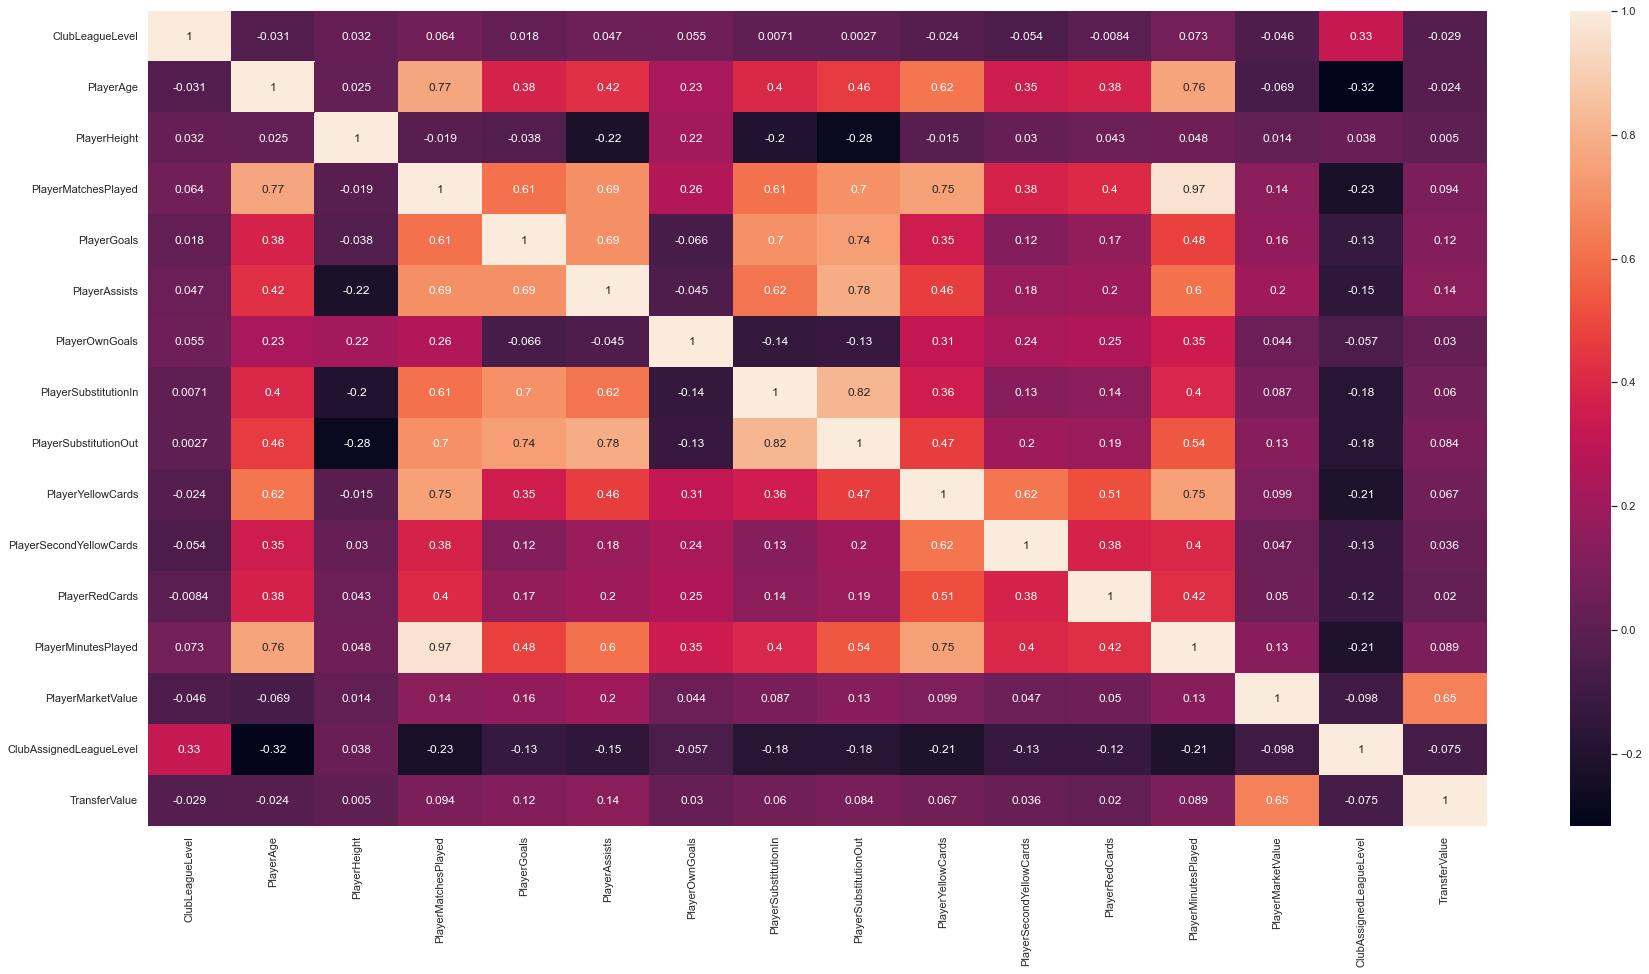

<Figure size 2880x2880 with 0 Axes>

In [31]:
to_correlation_df = transfer_df.drop(labels=['PlayerWithoutClub'],axis=1)
corrMatrix = to_correlation_df.corr(method='pearson')
heatmap = sn.heatmap(corrMatrix, annot=True)
plt.figure(figsize=(40,40))
heatmap.get_figure().savefig('plots/pearsons-correlation.png', dpi=200)
plt.show()

Na podstawie przedstawionej macierzy, zauważyć możemy silne powiązanie pomiędzy następującymi zmiennymi: (PlayerMinutesPlayed/PlayerMatchesPlayed - oczywista zależność liczby spędzonych minut na boisku z liczbą zagranych meczów - 0.97), (PlayerSubstitutionIn/PlayerSubstitutionOut - zależność pomiędzy liczbą wejść i zejść z/na ławkę rezerwowych - 0.82), czy chociażby (PlayerSubstitutionOut/PlayerAssist - zależność pomiędzy liczbą zejść na ławkę rezerwowych a zdobytymi asystami). Najbardziej skorelowane ujemnie są cechy ClubAssignedLeagueLevel oraz PlayerAge (-0.32).

### Średnia oraz mediana wieku piłkarzy
***
Poniżej przedstawiono wykres gęstości rozkładu wieku transferowanych piłkarzy. Zauważyć możemy, że średnia wieku piłkarza to lekko powyżej 24 lat, natomiast mediana jego wieku to równo 24 lata.

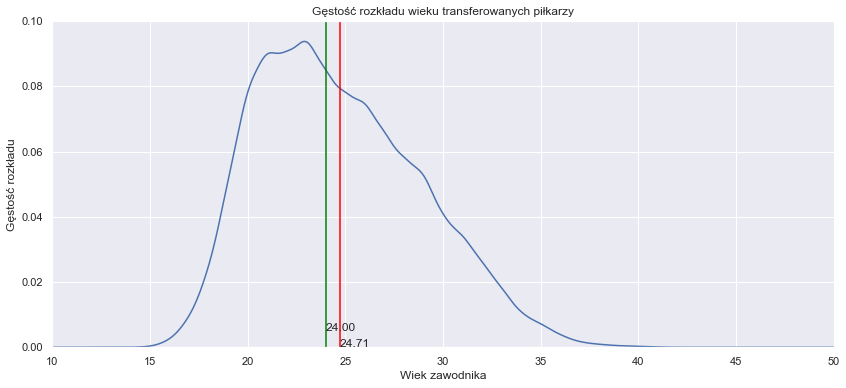

In [45]:
ax = transfer_df['PlayerAge'].plot(kind='density', figsize=(14,6))
ax.set_xlabel('Wiek zawodnika')
ax.set_ylabel('Gęstość rozkładu')
plt.xlim([10, 50])
plt.ylim([0, 0.1])
plt.title('Gęstość rozkładu wieku transferowanych piłkarzy')
ax.axvline(transfer_df['PlayerAge'].mean(), color='red')
ax.text(transfer_df['PlayerAge'].mean(), 0, "{:.2f}".format(transfer_df['PlayerAge'].mean()))
ax.axvline(transfer_df['PlayerAge'].median(), color='green')
ax.text(transfer_df['PlayerAge'].median(), 0.005, "{:.2f}".format(transfer_df['PlayerAge'].median()))
plt.savefig('plots/player-age-density.png')

### Średnia oraz mediana wartości transferów piłkarzy
***
Poniżej przedstawiono wykres gęstości rozkładu kwoty transferu dla poszczególnych piłkarzy. Zauważyć możemy, że średnia kwota transferu za piłkarza to około 500tyś euro.

c:\users\maciek\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


546494.0722064662
0.0


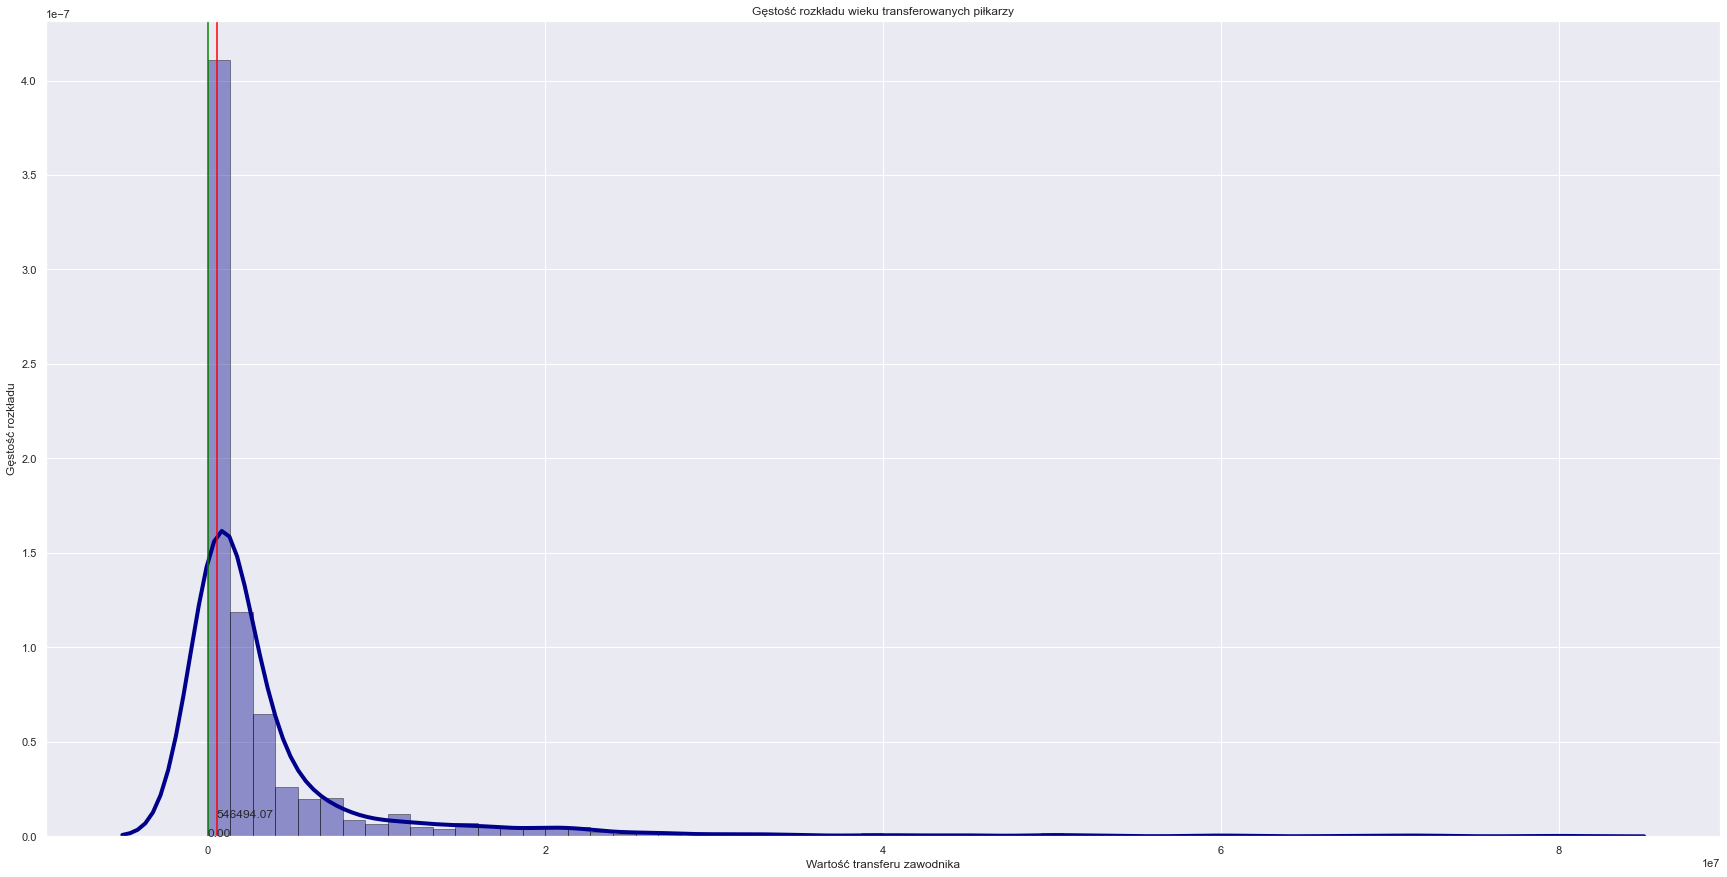

In [61]:
transfer_df['TransferValue'] = transfer_df['TransferValue'].astype("int64")
transferValues = []
for value in transfer_df["TransferValue"]:
    if value != 0:
        transferValues.append(value)
sns.set(rc={'figure.figsize':(30,15)})
sns.distplot(transferValues, kde=True,
             bins=int(180/3), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel('Wartość transferu zawodnika')
plt.ylabel('Gęstość rozkładu')
plt.title('Gęstość rozkładu wieku transferowanych piłkarzy')
plt.axvline(transfer_df['TransferValue'].mean(), color='red')
plt.axvline(transfer_df['TransferValue'].median(), color='green')
plt.text(transfer_df['TransferValue'].median(), 0, "{:.2f}".format(transfer_df['TransferValue'].median()))
plt.text(transfer_df['TransferValue'].mean(), 0.00000001, "{:.2f}".format(transfer_df['TransferValue'].mean()))

plt.savefig('plots/player-transfer-value-density.png')

### Procent zawodników na danej pozycji
***
Poniższe diagramy przedstawiają jaki procent transferowanych zawodników gra na konkretnej pozycji. Zauważyć możemy, że najczęściej transferowanymi zawodnikami są środkowi obrońcy (15.56%) oraz środkowi napastnicy (17.43%). W odniesieniu do ogólnych pozycji zawodników, graczem najczęściej transferowanym jest napastnik.

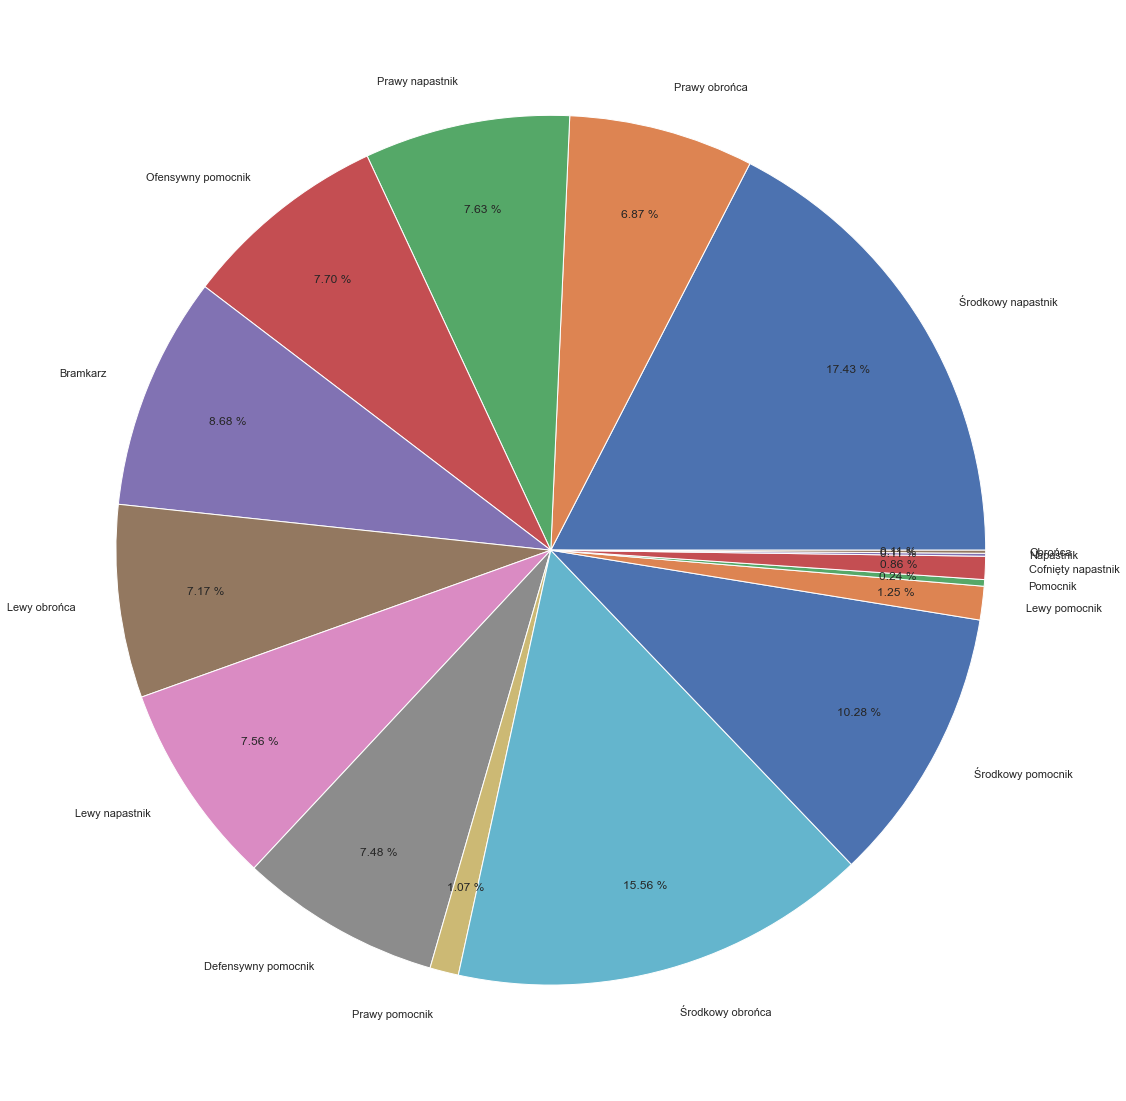

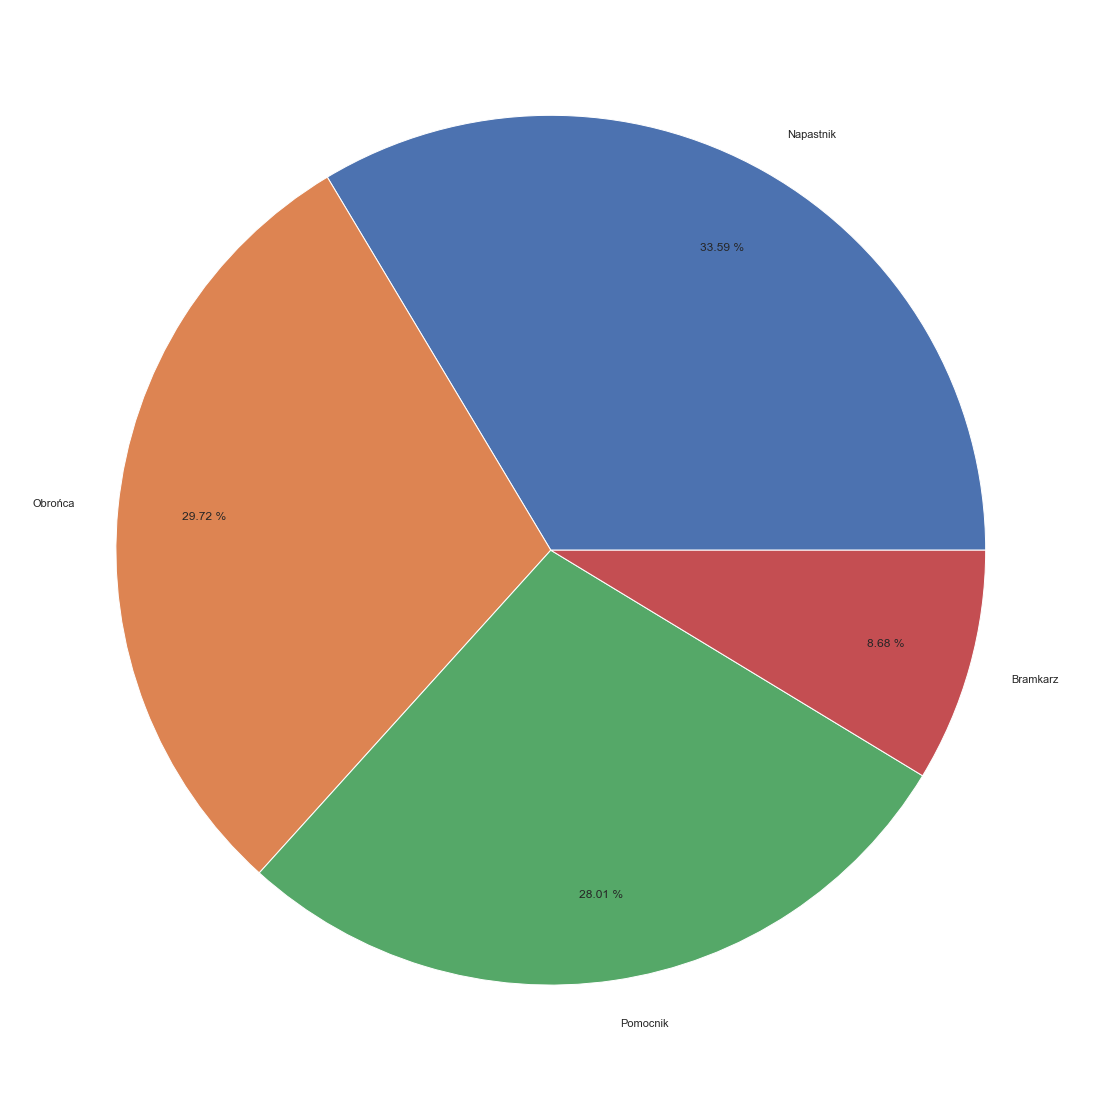

In [89]:
positions_unique_list = []
for position in transfer_df["PlayerPosition"]:
    if position not in positions_unique_list:
        positions_unique_list.append(position)

amout_of_players = []
for position in positions_unique_list:
    number = transfer_df.loc[transfer_df["PlayerPosition"] == position].count()[0]
    amout_of_players.append(number)

plt.figure(figsize=(20,20))
plt.pie(amout_of_players, labels=positions_unique_list, autopct='%.2f %%', pctdistance=0.8)
plt.savefig('plots/player-percent-by-position.png')
plt.show()

generic_positions_unique_list = []
for position in transfer_df["PlayerGenericPosition"]:
    if position not in generic_positions_unique_list:
        generic_positions_unique_list.append(position)

generic_amout_of_players = []
for position in generic_positions_unique_list:
    number = transfer_df.loc[transfer_df["PlayerGenericPosition"] == position].count()[0]
    generic_amout_of_players.append(number)

plt.figure(figsize=(20,20))
plt.pie(generic_amout_of_players, labels=generic_positions_unique_list, autopct='%.2f %%', pctdistance=0.8)
plt.savefig('plots/player-percent-by-generic-position.png')
plt.show()

### Liczba piłkarzy w danej kategorii wiekowej
***
Histogram przedstawia liczbę piłkarzy w określonej kategorii wiekowej. Najwięcej zawodników (10584) znajduje się w przedziale wiekowym od 22 do 30 lat ("W sile wieku"), najmniej piłkarzy z kolei (dwóch), należy do kategorii wiekowej "Junior młodszy" (pomiędzy 15 a 16 lat)

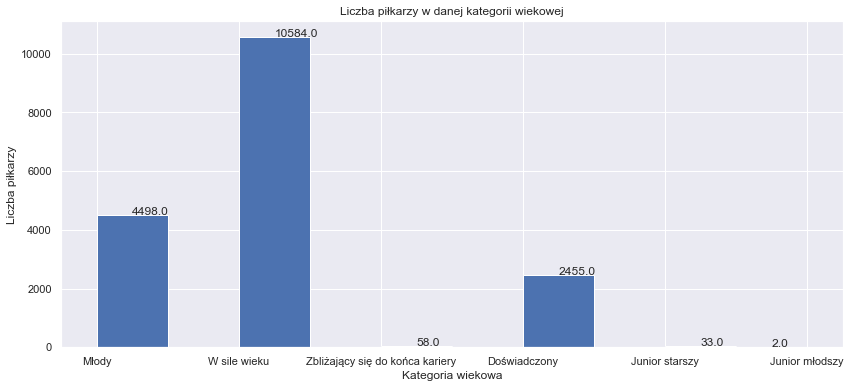

In [75]:
plt.figure(figsize=(14,6))
_, _, patches = plt.hist(transfer_df['PlayerAgeGroup'])

plt.xlabel('Kategoria wiekowa')
plt.ylabel('Liczba piłkarzy')
plt.title('Liczba piłkarzy w danej kategorii wiekowej')
plt.savefig('plots/players-by-age-category.png')

for pp in patches:
   x = (pp._x0 + pp._x1)/2
   y = pp._y1 + 0.05
   if pp._y1 > 0:
    plt.text(x, y, pp._y1)

### Wartość lig narodowych na podstawie ich zawodników
***
Diagram demonstruje różnice wartości lig piłkarskich wynikacjące z ceny transferowej wszystkich zawodników grających w danej lidze. Na podstawie transferów najwyżej wycenić możemy ligi angielskie, włoskie oraz hiszpańskie.

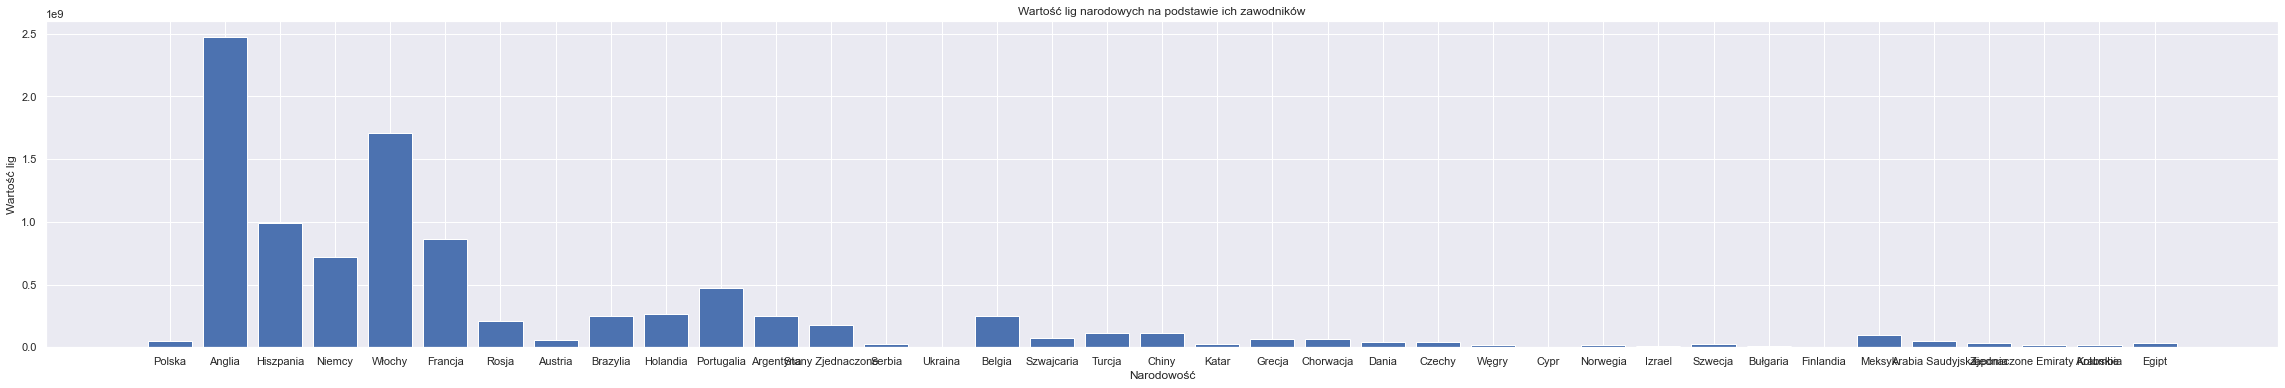

In [76]:
league_unique_list = []
for league in transfer_df["ClubLeagueNationality"]:
    if league not in league_unique_list:
        league_unique_list.append(league)

amout_of_money = []
for league in league_unique_list:
    transferValues = transfer_df.loc[(transfer_df['ClubLeagueNationality'] == league)]['TransferValue']
    values = 0
    for value in transferValues:
        converted_value = int(value)
        values= values + converted_value
    amout_of_money.append(values)
    
plt.figure(figsize=(40,6))
plt.bar(league_unique_list, amout_of_money)
plt.xlabel('Narodowość')
plt.ylabel('Wartość lig')
plt.title('Wartość lig narodowych na podstawie ich zawodników')
plt.savefig('plots/national-leagues-based-on-players.png')

### Procent zawodników na poszczególnych pozycja w poszczególnych ligach
***
Poniższy wykres przedstawia rozkład liczby zawodników grających na konkretnych pozycjach, dla każdej z lig piłkarskich. Zauważyć możemy tu pewną regularność. Niezależnie od kraju oraz poziomu rozgrywek, w każdej z lig większość zawodników stanowią napastnicy. Liczba obrońców oraz pomocników w obrębie każdej z lig jest porównywalna, natomiast liczność bramkarzy w lidze, jest zawsze najmniejsza spośród wszystkich pozycji. Najwięcej bramkarzy gra w klubach japońskich oraz amerykańskich, natomiast najwięcej napastików, znajduje się w lidze angielskiej, a także rosyjskiej.

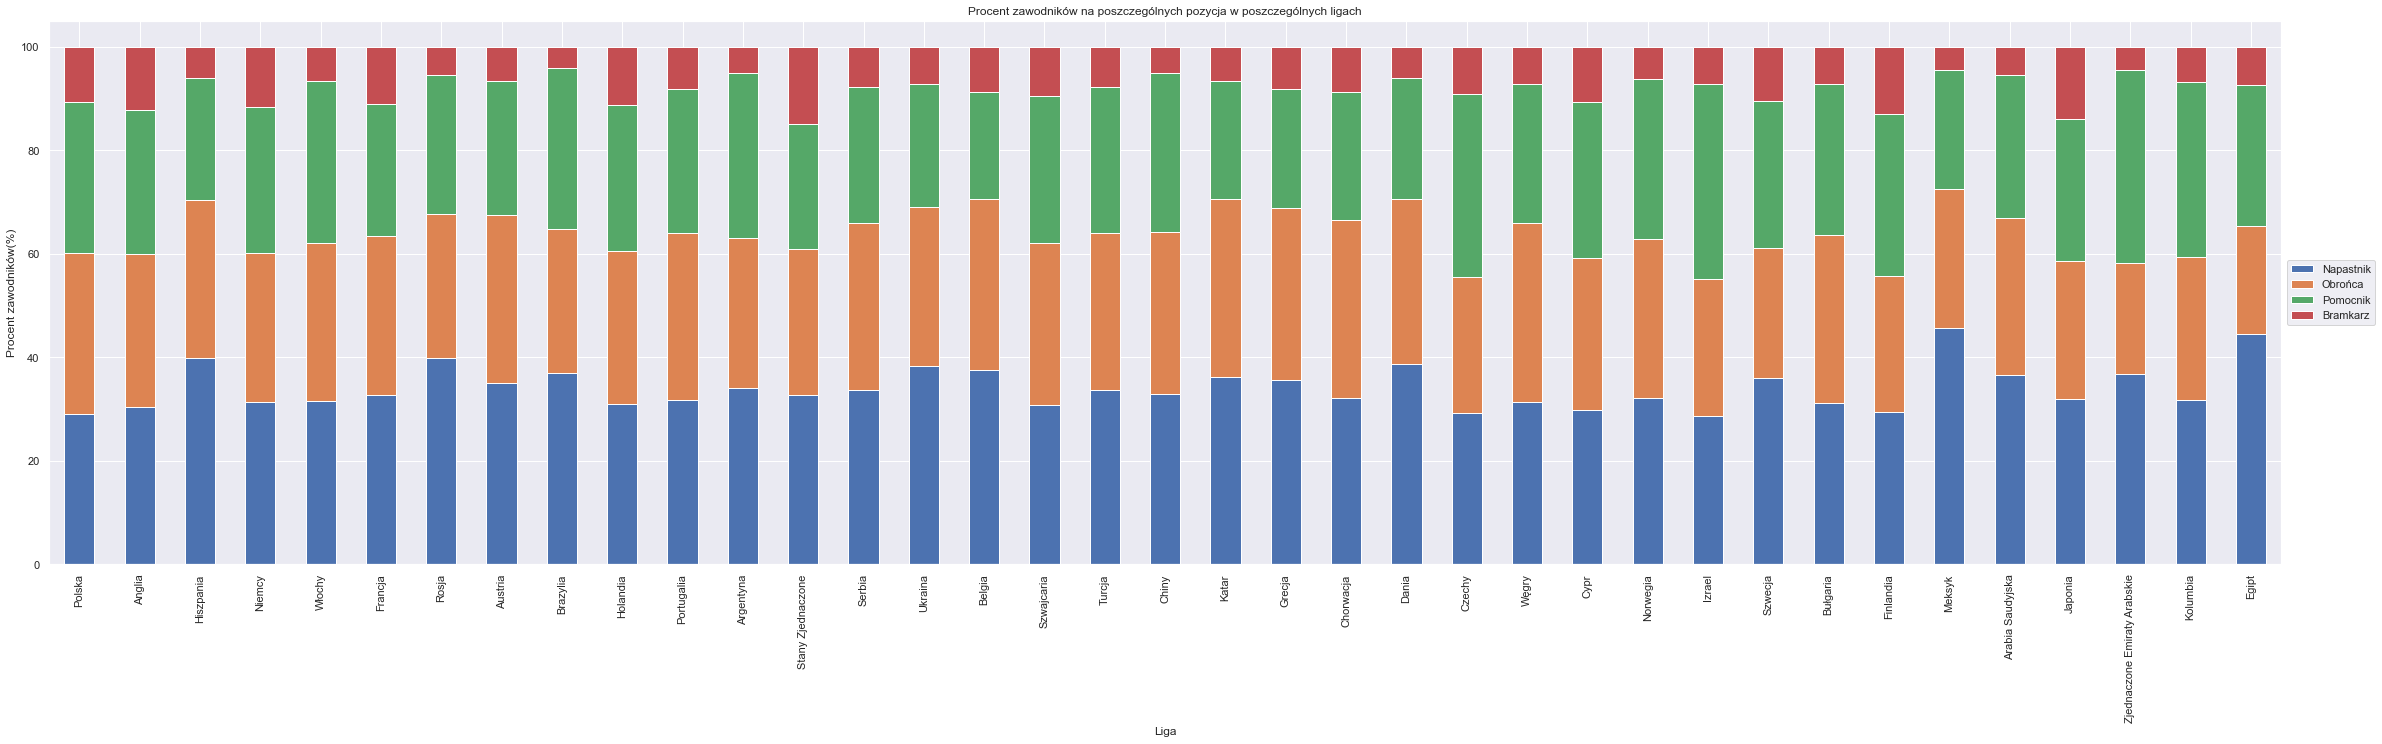

In [83]:
listNumberOfPlayers = []
for league in league_unique_list:
    amout_of_players = []
    for position in positions_unique_list:
        number = transfer_df.loc[(transfer_df["PlayerGenericPosition"] == position) & (transfer_df["ClubLeagueNationality"] == league)].count()[0]
        amout_of_players.append(number)
    listNumberOfPlayers.append(amout_of_players)  
df = pd.DataFrame(columns=positions_unique_list, data=listNumberOfPlayers, index=league_unique_list)
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(40,10) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Liga")
plt.ylabel("Procent zawodników(%)")
plt.title('Procent zawodników na poszczególnych pozycja w poszczególnych ligach')
plt.savefig('plots/players-percent-by-league-by-position.png')
plt.show()

### Procent wszystkich goli strzelonych przez zawodników na określonej pozycji
***
Poniższy wykres przedstawia informacje o procencie wszystkich bramek strzelonych przez zawodników na konkretnych pozycjach. Zgodnie z przewidywaniami najbardziej bramkostrzelnymi pozycjami wśród transferowanych zawodników są: środkowy, prawy oraz lewy napastnik, a także ofensywny pomocnik.

[323, 19, 183, 135]


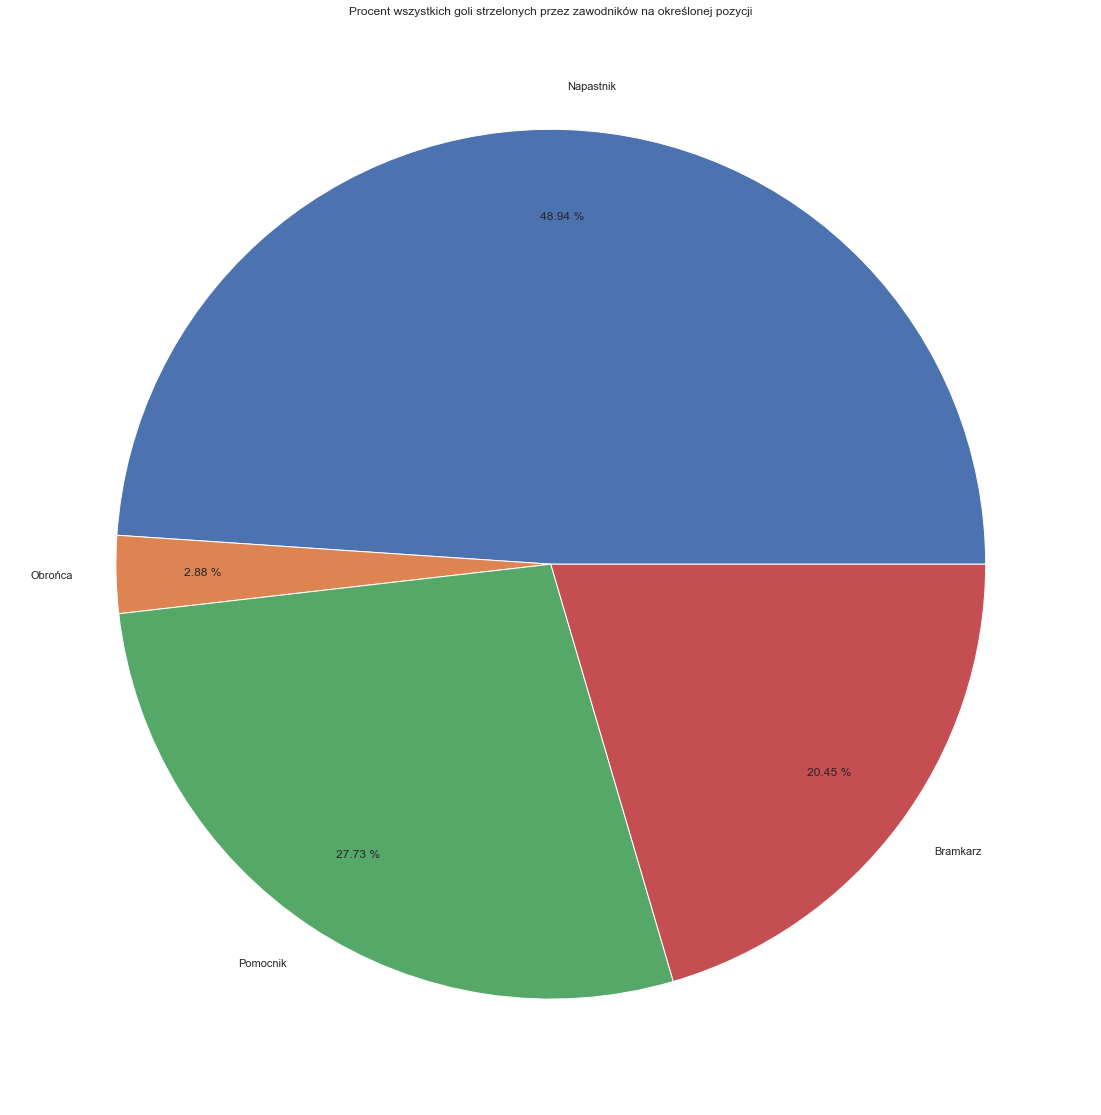

In [84]:
amout_of_goals = []
for position in positions_unique_list:
    goals = transfer_df.loc[(transfer_df['PlayerPosition'] == position)]['PlayerGoals']
    goals_sum = 0
    for value in goals:
        converted_value = int(value)
        goals_sum= goals_sum + converted_value
    amout_of_goals.append(goals_sum)
print(amout_of_goals)
plt.figure(figsize=(20,20))

plt.pie(amout_of_goals, labels=positions_unique_list, autopct='%.2f %%', pctdistance=0.8)
plt.title('Procent wszystkich goli strzelonych przez zawodników na określonej pozycji')
plt.savefig('plots/goals-percent-by-position.png')
plt.show()

### Procent strzelonych goli w zależności od pozycji zawodników w poszczególnych ligach
***
Przedstawiony poniżej skumulowany wykres kolumnowy ilustruje liczbę bramek, strzelanych przez zawodników na określonych pozycjach, w kontekście każdej z lig narodowych. Na podstawie tego wykresu powiedzieć możemy, że największy procent środkowych napastników strzelających bramki w ramach własnej ligii znajduje się w lidze duńskiej. Ponadto, w lidze fińskiej, zauważyć można największy procent bramkostrzelnych ofensywnych pomocników.

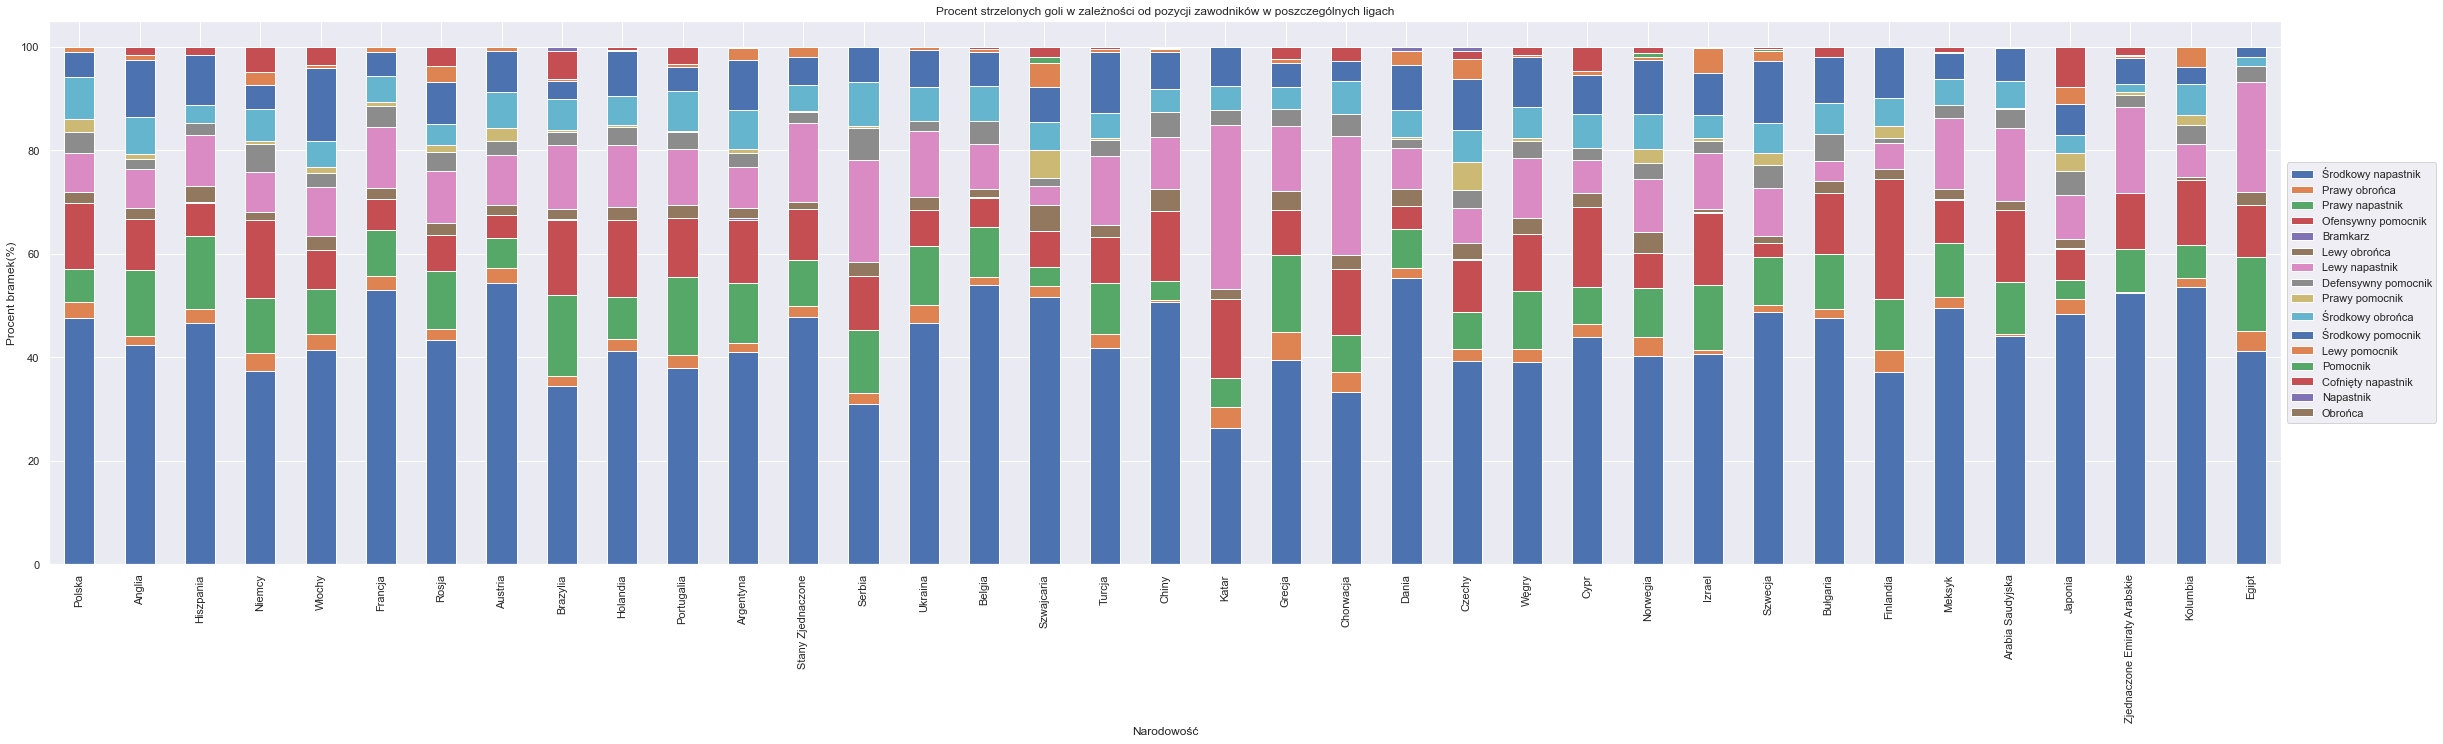

In [91]:
listNumberOfGoals = []
for league in league_unique_list:
    amout_of_goals = []
    for position in positions_unique_list:
        goals_sum = 0
        goals = transfer_df.loc[(transfer_df["PlayerPosition"] == position) & (transfer_df["ClubLeagueNationality"] == league)]['PlayerGoals']
        for value in goals:
            converted_value = int(value)
            goals_sum= goals_sum + converted_value
        amout_of_goals.append(goals_sum)
    listNumberOfGoals.append(amout_of_goals)
a_transfer_df = pd.DataFrame(columns=positions_unique_list, data=listNumberOfGoals, index=league_unique_list)
stacked_data = a_transfer_df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(40,10) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Narodowość')
plt.ylabel('Procent bramek(%)')
plt.title('Procent strzelonych goli w zależności od pozycji zawodników w poszczególnych ligach')
plt.savefig('plots/goals-percent-by-position-by-league.png')
plt.show()

### Średnia bramek na mecz w zależności od pozycji
***
Wykres przedstawia średnią liczbę bramek zdobywanych przez piłkarzy w ciągu jednego meczu, w kontekście ich pozycji na boisku. Pomijając wartości średniej liczby bramek na mecz dla napastników, zauważyć można zdecydowanie wyższą średnią liczbę bramek strzelanych przez prawych obrońców, od średniej dla środkowych pomocników.

<BarContainer object of 16 artists>

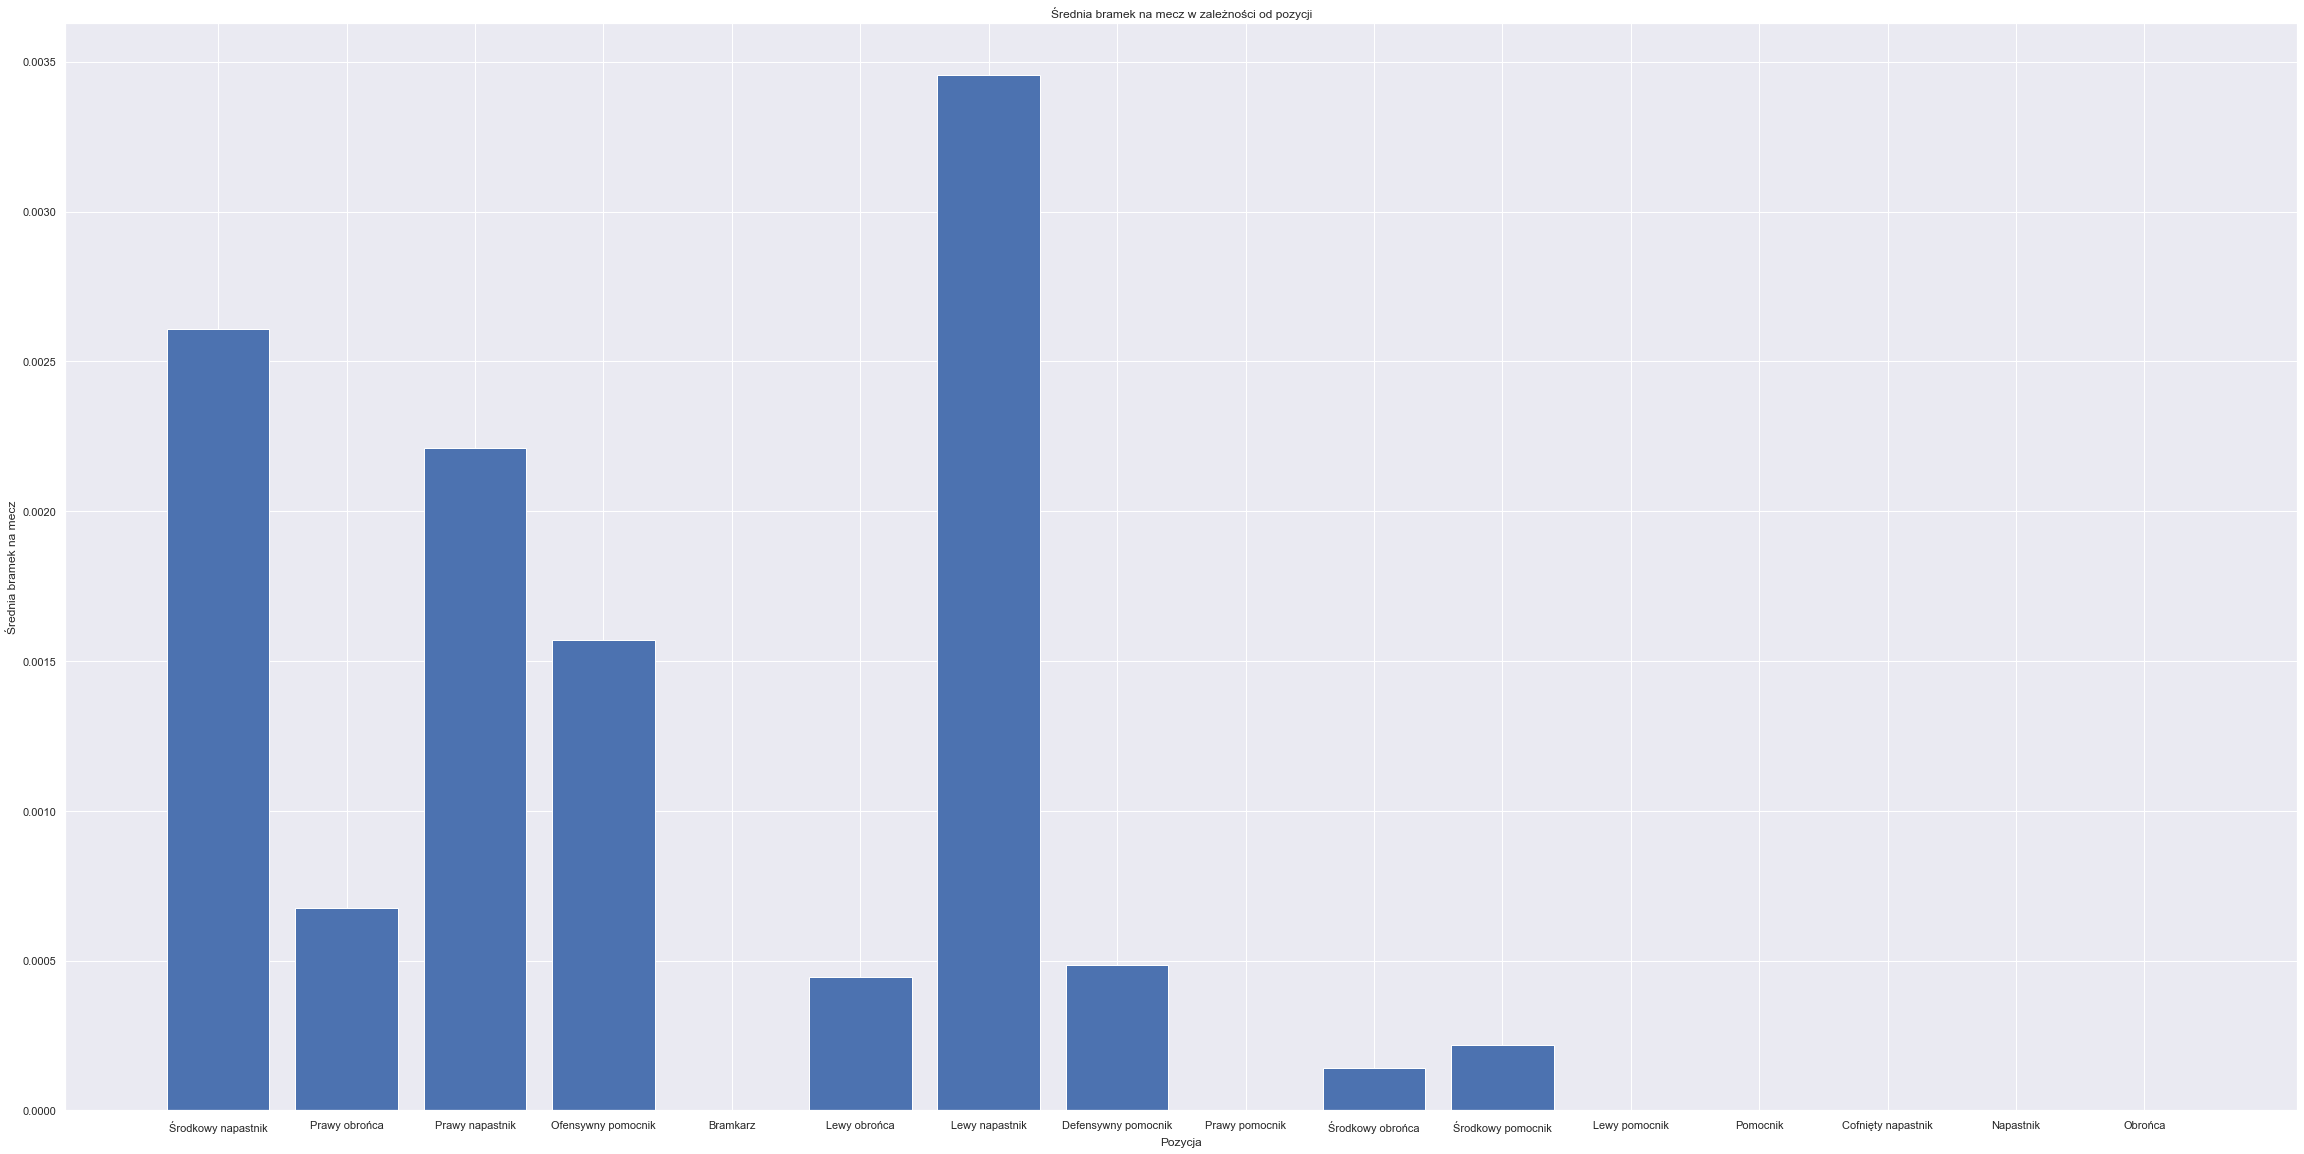

In [92]:
gpratio = [i / j for i, j in zip(amout_of_goals, amout_of_players)]
amout_of_appearances = []
for position in positions_unique_list:
    appearances = transfer_df.loc[(transfer_df['PlayerPosition'] == position)]['PlayerMatchesPlayed']
    appearances_amount = 0
    for value in appearances:
        converted_value = int(value)
        appearances_amount= appearances_amount + converted_value
    amout_of_appearances.append(appearances_amount)
apratio = [i / j for i, j in zip(amout_of_appearances, amout_of_players)]
ggratio = [i / j for i, j in zip(gpratio, apratio)]
plt.figure(figsize=(40,20))
plt.xlabel('Pozycja')
plt.ylabel('Średnia bramek na mecz')
plt.title('Średnia bramek na mecz w zależności od pozycji')
plt.savefig('plots/avg-goals-by-position.png')
plt.bar(positions_unique_list, ggratio)

### Średnia liczba minut spędzona na boisku dla kategorii wiekowej Junior, oraz Młody w zależności od kraju ligi
***
Poniższy wykres przedstawia średnią liczbę minut, jaką spędzają na boisku zawodnicy w wieku do 22 lat, w odniesieniu do kraju, z którego wywodzi się dana liga piłkarska. Na najwięcej czasu na boisku, młodzi piłkarze mogą liczyć w Holandii, Włoszech, Hiszpanii oraz Anglii.

<BarContainer object of 37 artists>

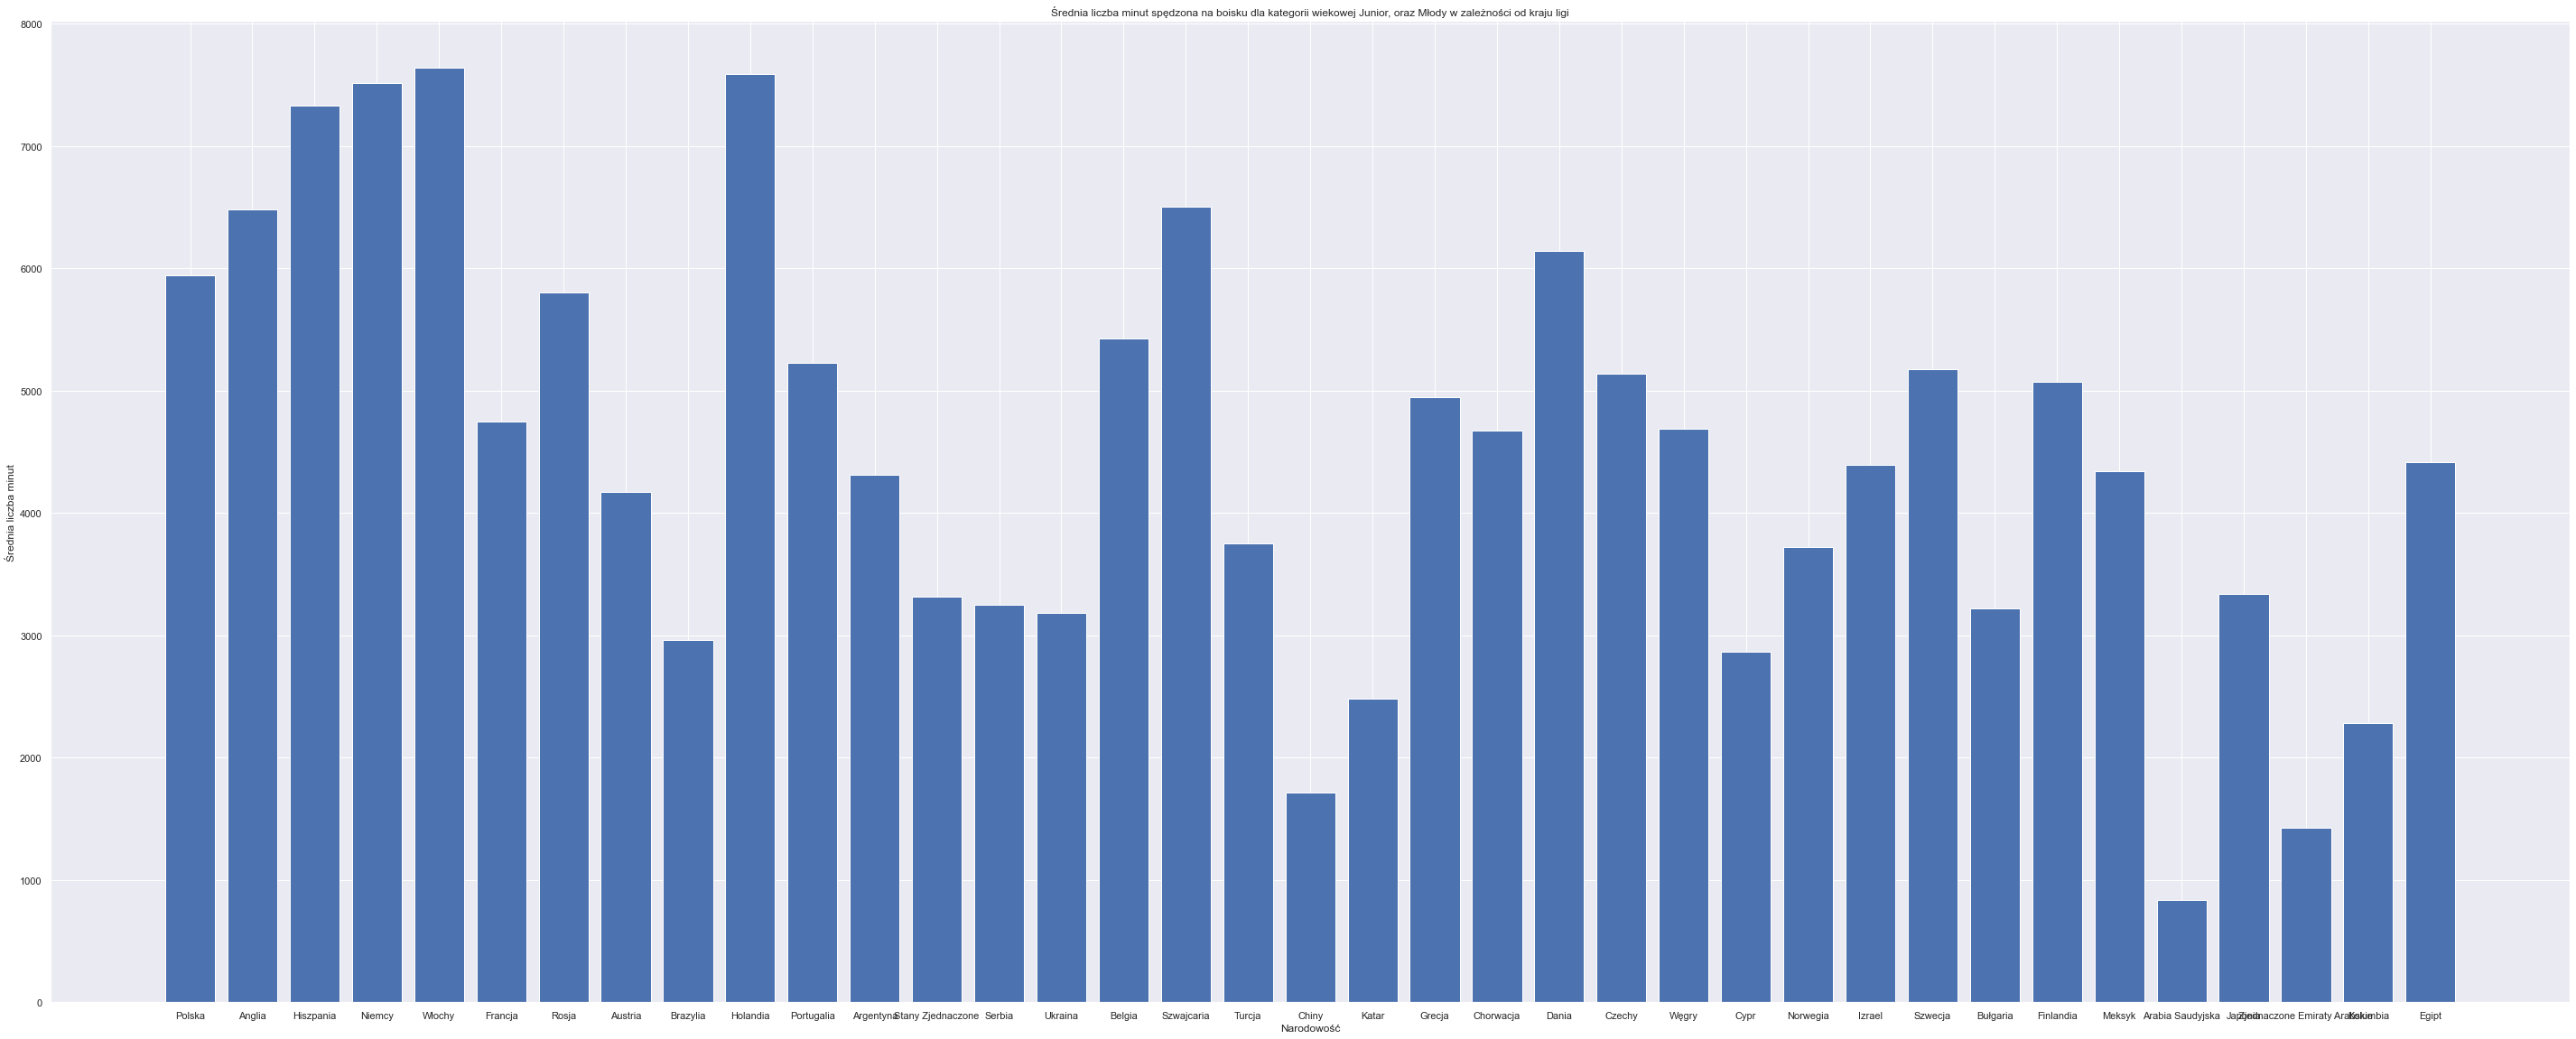

In [93]:
young_players = transfer_df.loc[
    (transfer_df['PlayerAgeGroup'] == 'Junior młodszy') | (transfer_df['PlayerAgeGroup'] == 'Junior starszy') | (transfer_df['PlayerAgeGroup'] == 'Młody')]
minutes_played = []
for league in league_unique_list:
    minutes_played.append(statistics.mean(young_players.loc[(young_players['ClubLeagueNationality'] == league)]['PlayerMinutesPlayed']))
plt.figure(figsize=(50,20))
plt.xlabel('Narodowość')
plt.ylabel('Średnia liczba minut')
plt.title('Średnia liczba minut spędzona na boisku dla kategorii wiekowej Junior, oraz Młody w zależności od kraju ligi')
plt.savefig('plots/avg-minutes-for-youngs-by-nationality.png')
plt.bar(league_unique_list, minutes_played)

### Najbardziej wartościowe kluby na podstawie wartości sprzedawanych/kupowanych zawodników
***
Wykres przedstawia 20 najbardziej wartościowych klubów w kontekście wartości sprzedawanych, kupowanych lub wypożyczanych zawodników.

<BarContainer object of 20 artists>

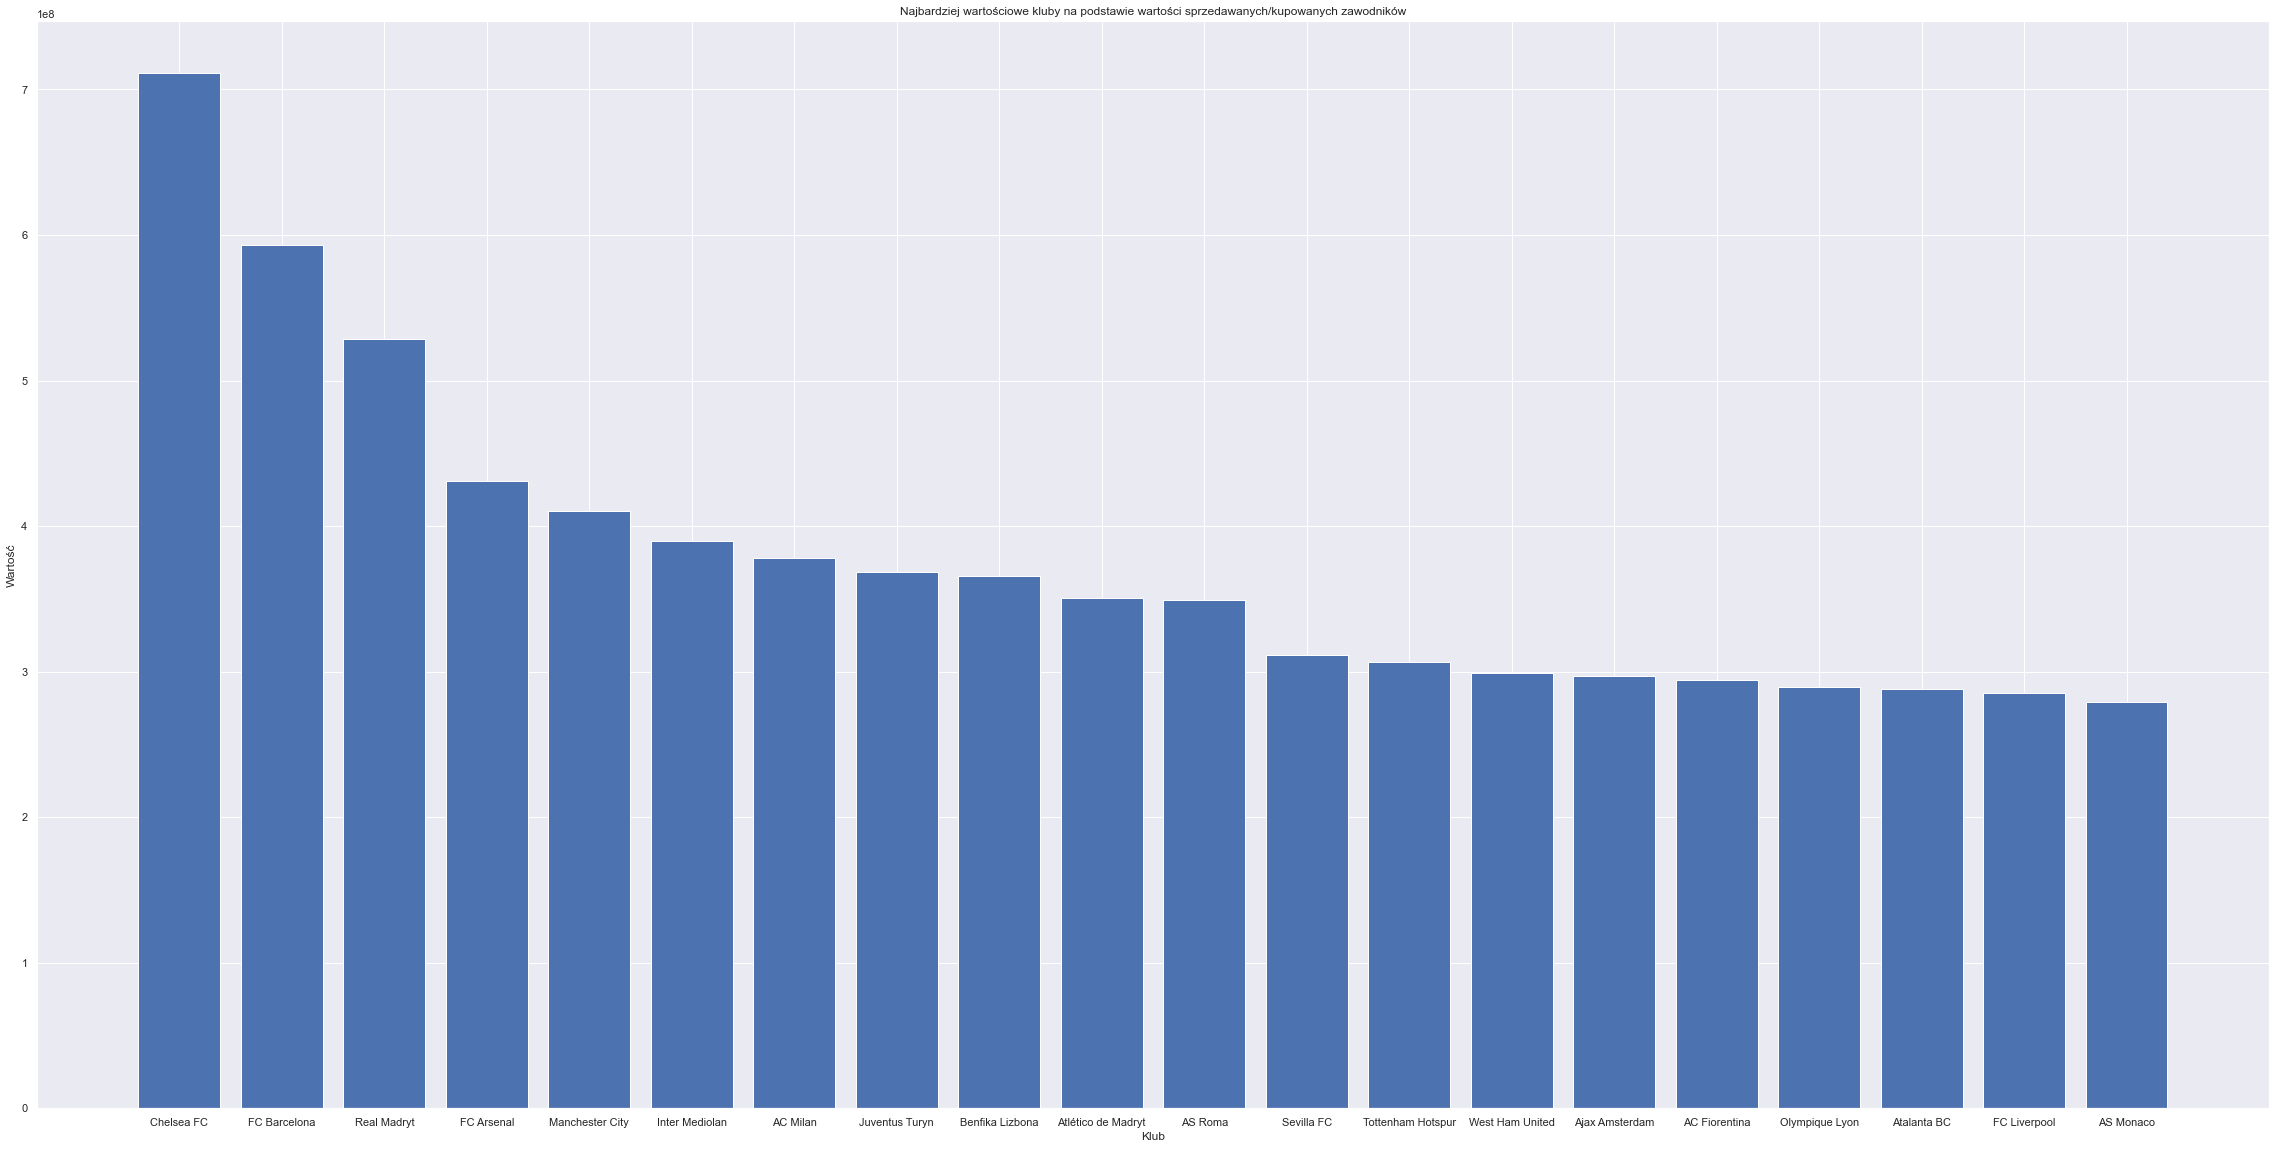

In [102]:
def sort_values(val):
    return val[0]

club_values = []
club_unique_list = list(set(transfer_df["Club"]))
for club in club_unique_list:
    club_values.append([math.fsum(transfer_df.loc[(transfer_df['Club'] == club)]['PlayerMarketValue']),club])
club_values.sort(key=sort_values,reverse=True)
plt.figure(figsize=(40,20))
top_club_names = [row[1] for row in club_values[:20]]
top_club_values = [row[0] for row in club_values[:20]]
plt.xlabel('Klub')
plt.ylabel('Wartość')
plt.title('Najbardziej wartościowe kluby na podstawie wartości sprzedawanych/kupowanych zawodników')
plt.savefig('plots/club-value-by-transfered-players.png')
plt.bar(top_club_names,top_club_values)

### Średnia kartek na mecz w zależności od narodowości zawodnika
***
Poniższy wykres obrazuje średnią liczba kartek na mecz w zależności od narodowości zawodnika. Czerwone kartki liczone są jako trzy, a same pomiary dotyczą 100 graczy, którzy wystąpili na boisku przynajmniej 100 razy. Zauważyć możemy największą średnią liczbę kartek na mecz wśród zawodników argentyńskich, urugwajskich oraz portugalskich.

<BarContainer object of 37 artists>

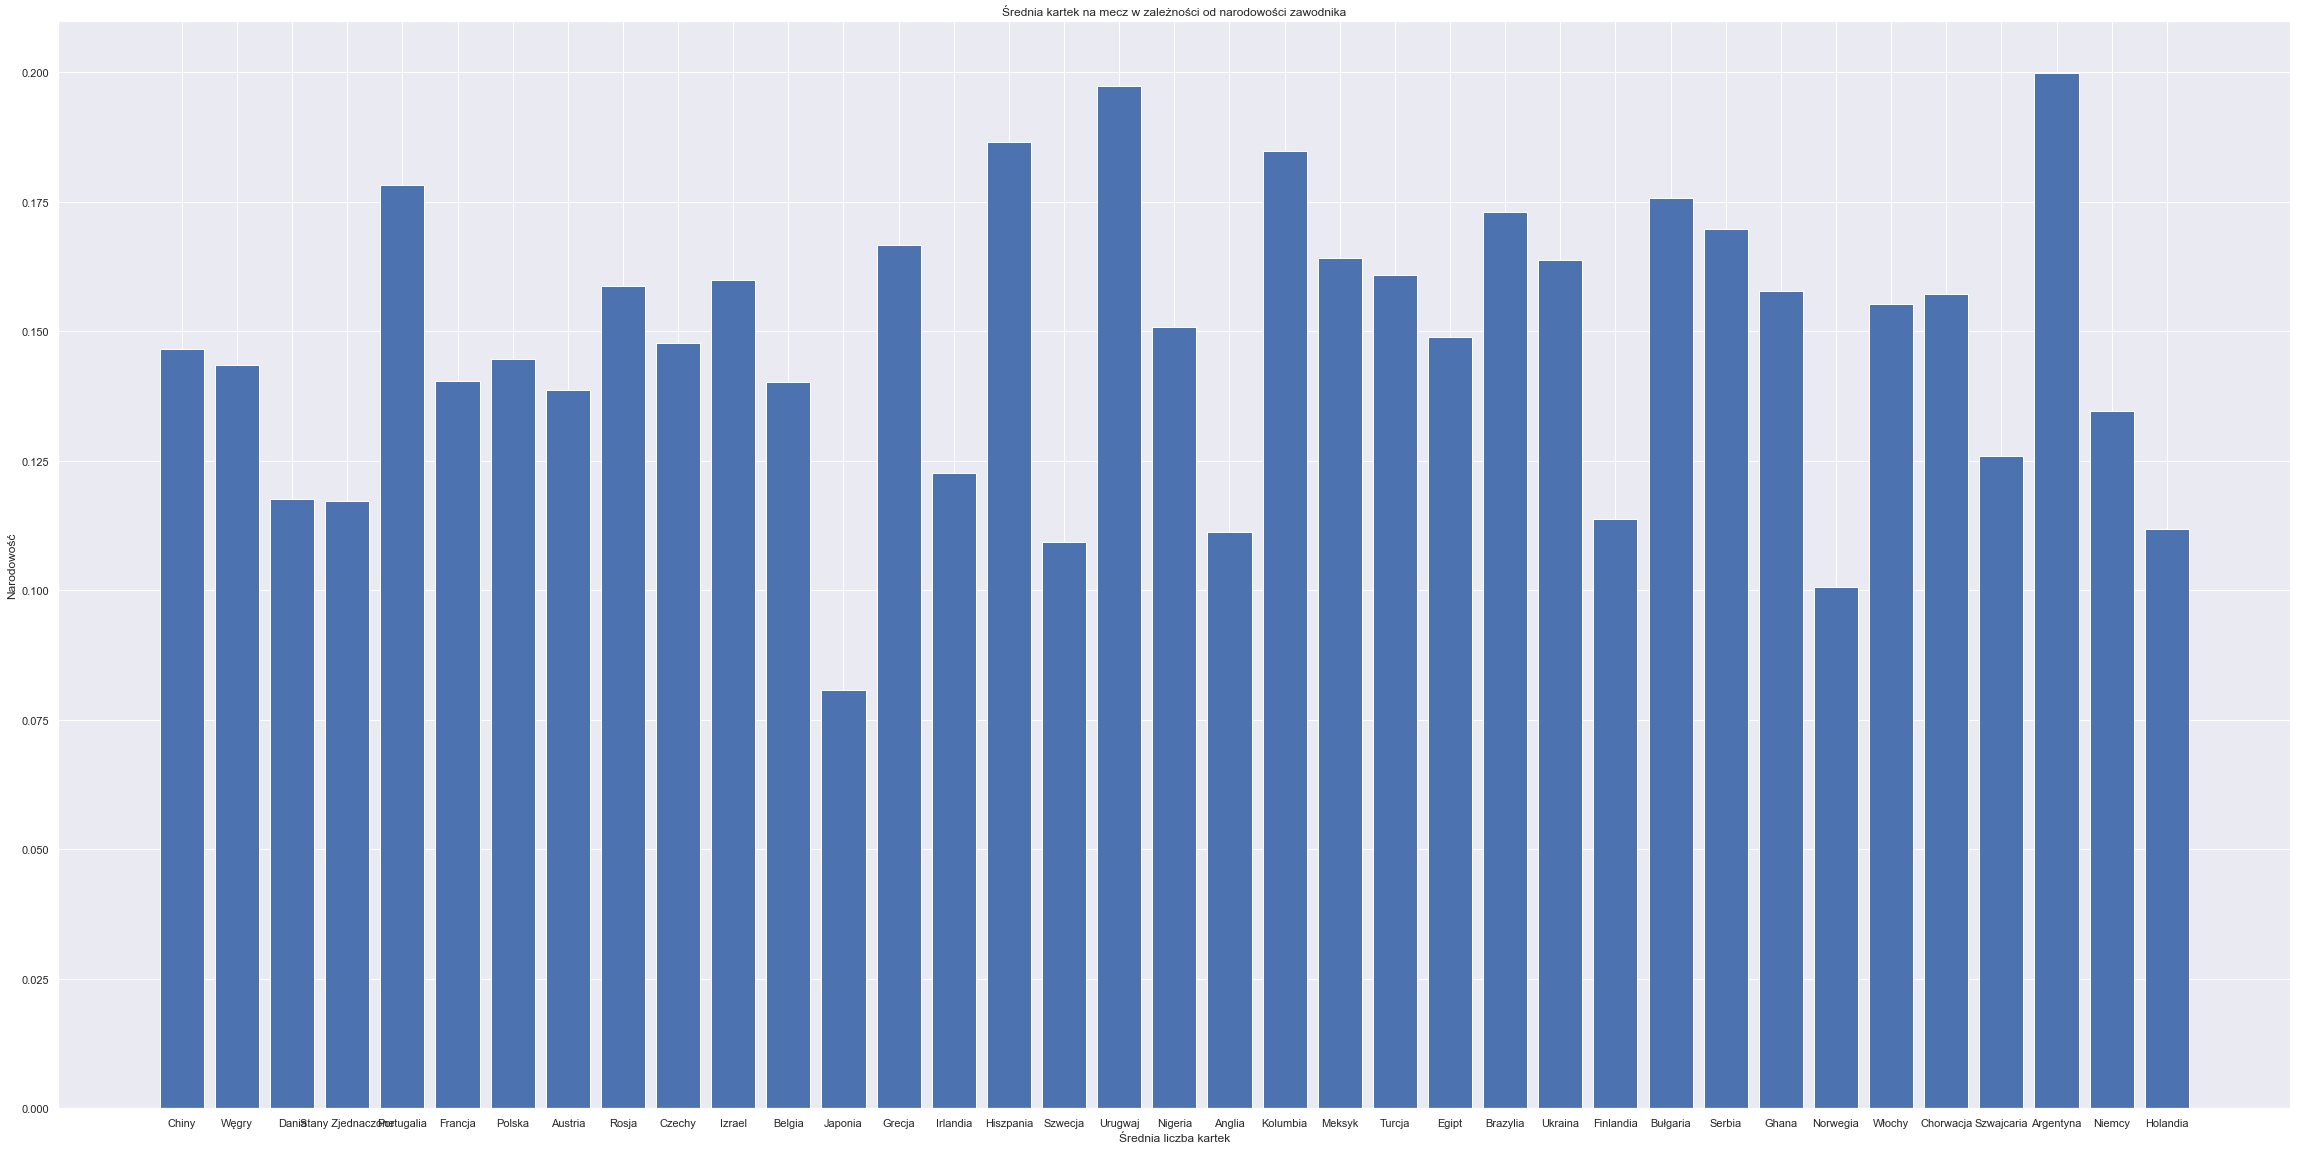

In [101]:
nationality_unique_list = list(set(transfer_df["PlayerNationality"]))
nationality_cards_per_match = []
display_nationalities = []
for nationality in nationality_unique_list:
    natianal_players = transfer_df[transfer_df["PlayerNationality"] == nationality]
    cards_ratio = [i / j if j > 100 else -1 for i, j in zip(natianal_players["PlayerYellowCards"] + natianal_players["PlayerSecondYellowCards"] + 3*natianal_players["PlayerRedCards"], natianal_players["PlayerMatchesPlayed"])]
    cards_ratio = [card_ratio for card_ratio in cards_ratio if card_ratio >= 0]
    if(len(cards_ratio) >= 100):
        display_nationalities.append(nationality)
        nationality_cards_per_match.append(statistics.mean(cards_ratio))
plt.figure(figsize=(40,20))
plt.xlabel('Średnia liczba kartek')
plt.ylabel('Narodowość')
plt.title('Średnia kartek na mecz w zależności od narodowości zawodnika')
plt.savefig('plots/player-cards-by-nationality.png')
plt.bar(display_nationalities,nationality_cards_per_match)

### Procent najczęściej wpuszczanych zawodników w trakcie meczu, w kontekście określonej pozycji
***
Poniższy wykres kołowy informuje jacy zawodnicy są najczęściej wpuszczani na boisko w trakcie meczu. Spośród transferowanych zawodników, na boisko w trakcie meczu najczęściej wchodzą środkowi napastnicy oraz środkowi pomocnicy.
Skumulowany wykres kolumnowy przedstawia analogiczną statystykę, ale przeprowadzoną z uwzględnieniem poszczególnych lig.

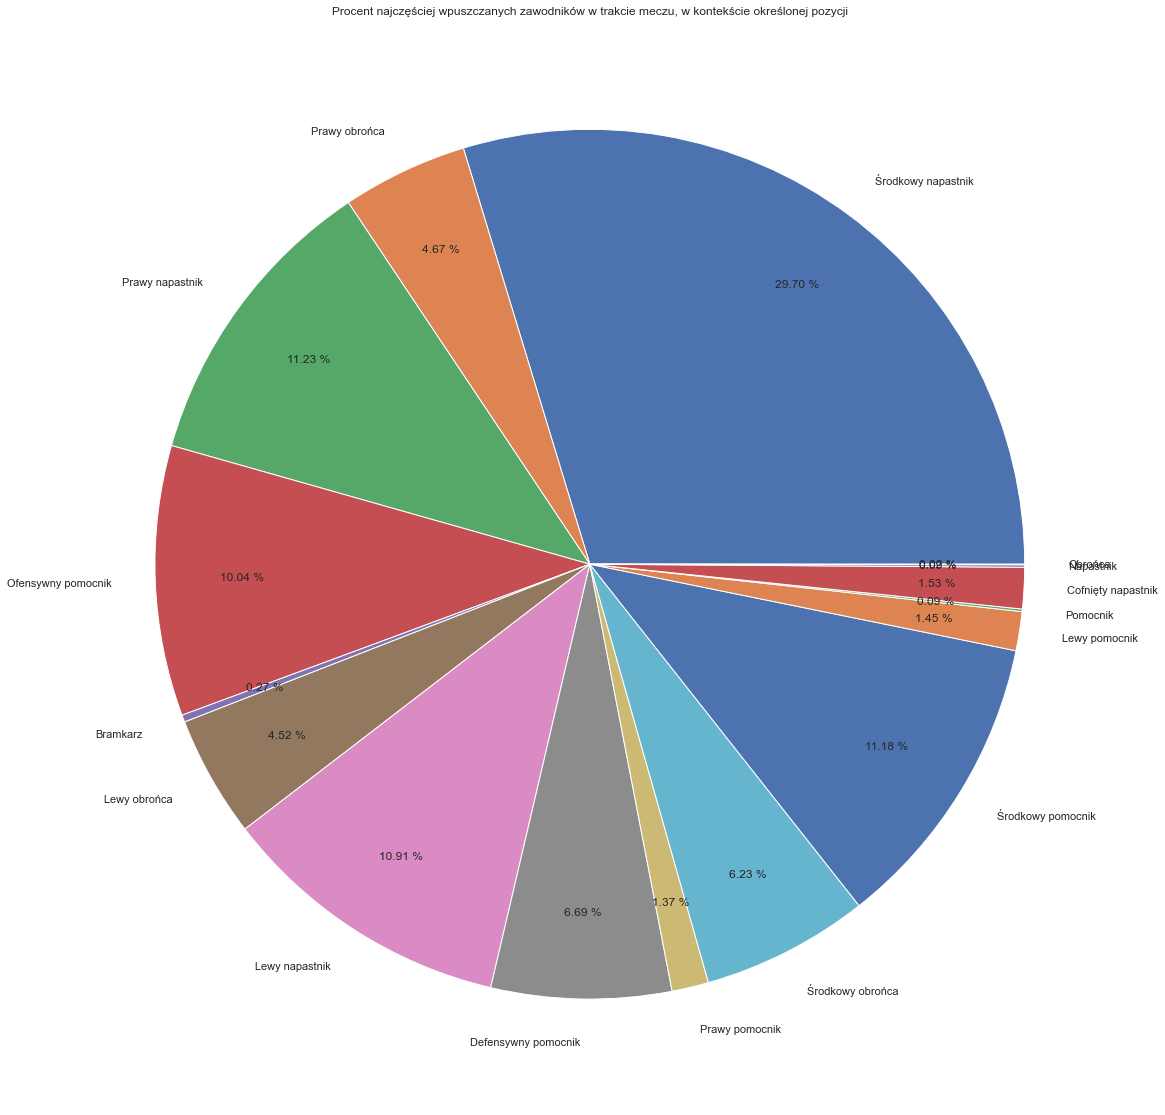

In [105]:
substition_list = []
for position in positions_unique_list:
    substition_list.append(math.fsum(transfer_df.loc[(transfer_df['PlayerPosition'] == position)]['PlayerSubstitutionIn']))
plt.figure(figsize=(20,20))

plt.pie(substition_list, labels=positions_unique_list, autopct='%.2f %%', pctdistance=0.8)
plt.title('Procent najczęściej wpuszczanych zawodników w trakcie meczu, w kontekście określonej pozycji')
plt.savefig('plots/subs-in-by-position.png')
plt.show()

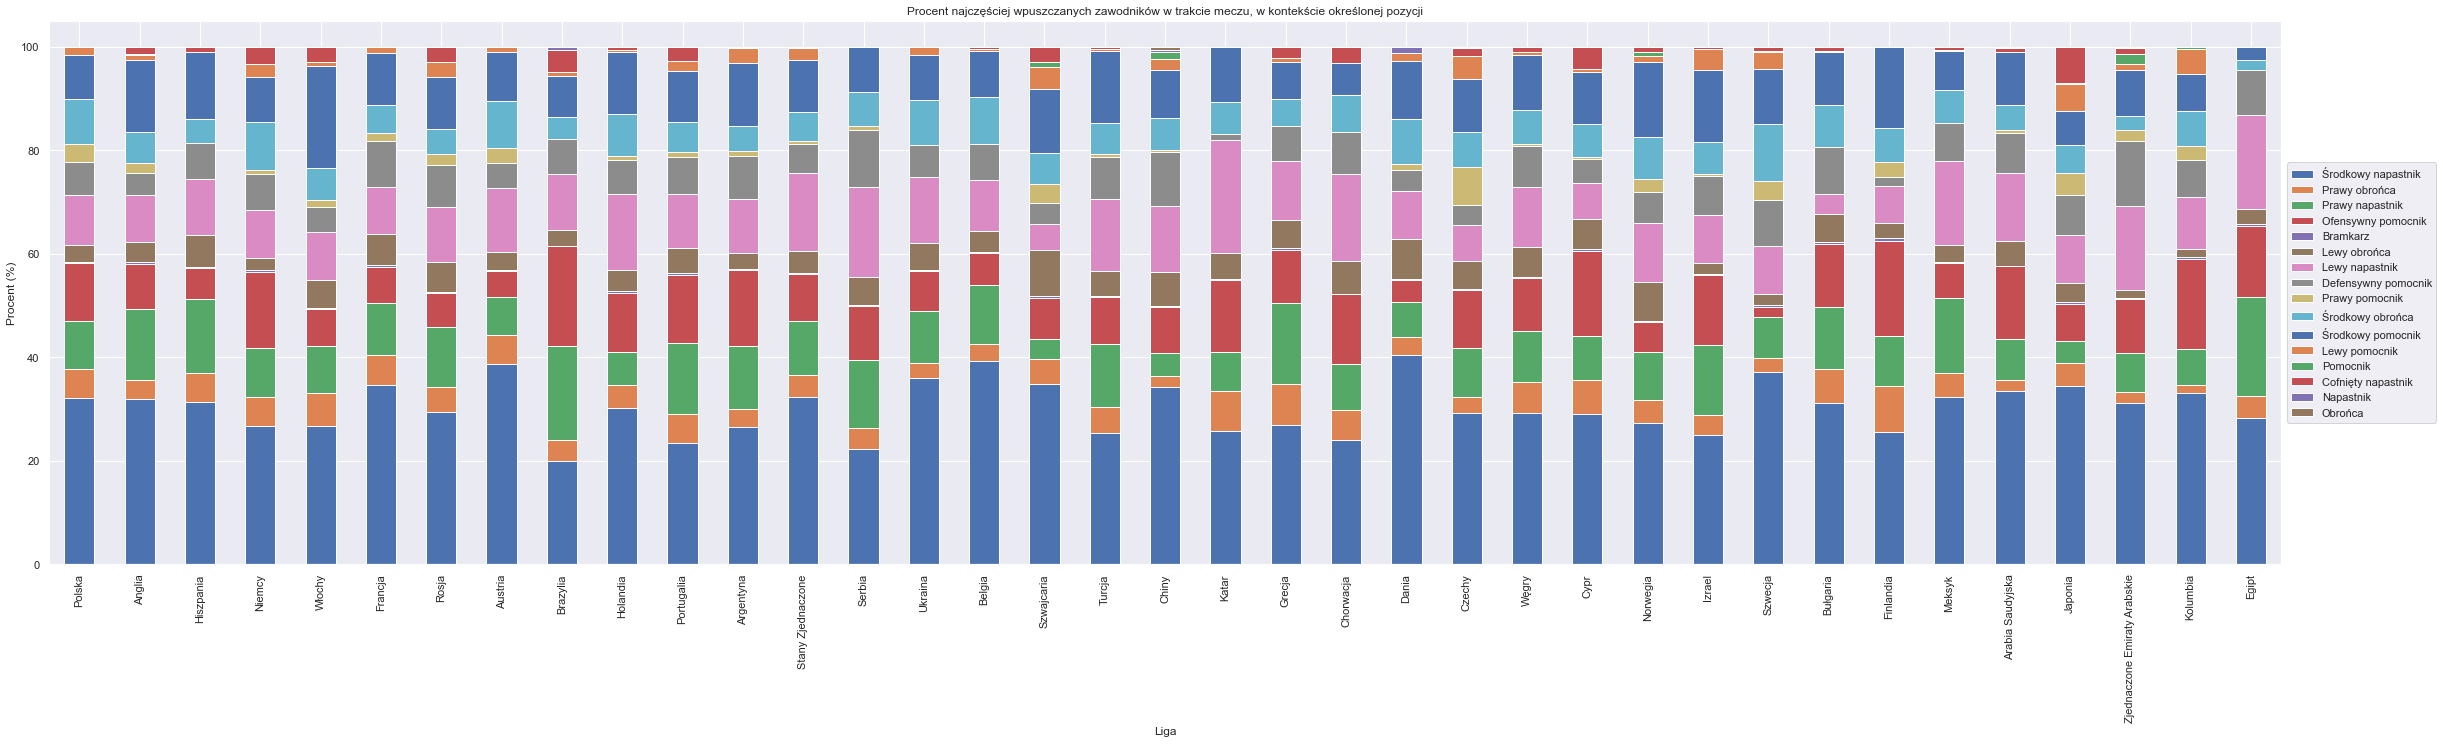

In [107]:
ListOfsubstition_list = []
for league in league_unique_list:
    substition_list = []
    for position in positions_unique_list:
        substition_list.append(math.fsum(transfer_df.loc[(transfer_df['PlayerPosition'] == position) & (transfer_df['ClubLeagueNationality'] == league)]['PlayerSubstitutionIn']))
    ListOfsubstition_list.append(substition_list)
df = pd.DataFrame(columns=positions_unique_list, data=ListOfsubstition_list, index=league_unique_list)
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(40,10) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Liga')
plt.ylabel('Procent (%)')
plt.title('Procent najczęściej wpuszczanych zawodników w trakcie meczu, w kontekście określonej pozycji')
plt.savefig('plots/subs-in-by-league-by-position.png')

### Częstotliwość zmiany zawodnika w zależności od wieku
***
Niniejszy wykres przedstawia częstotliwość zmieniania zawodnika (zarówno wejścia z ławki jak i zejścia z boiska) w trakcie meczu, w zależności od wieku gracza.

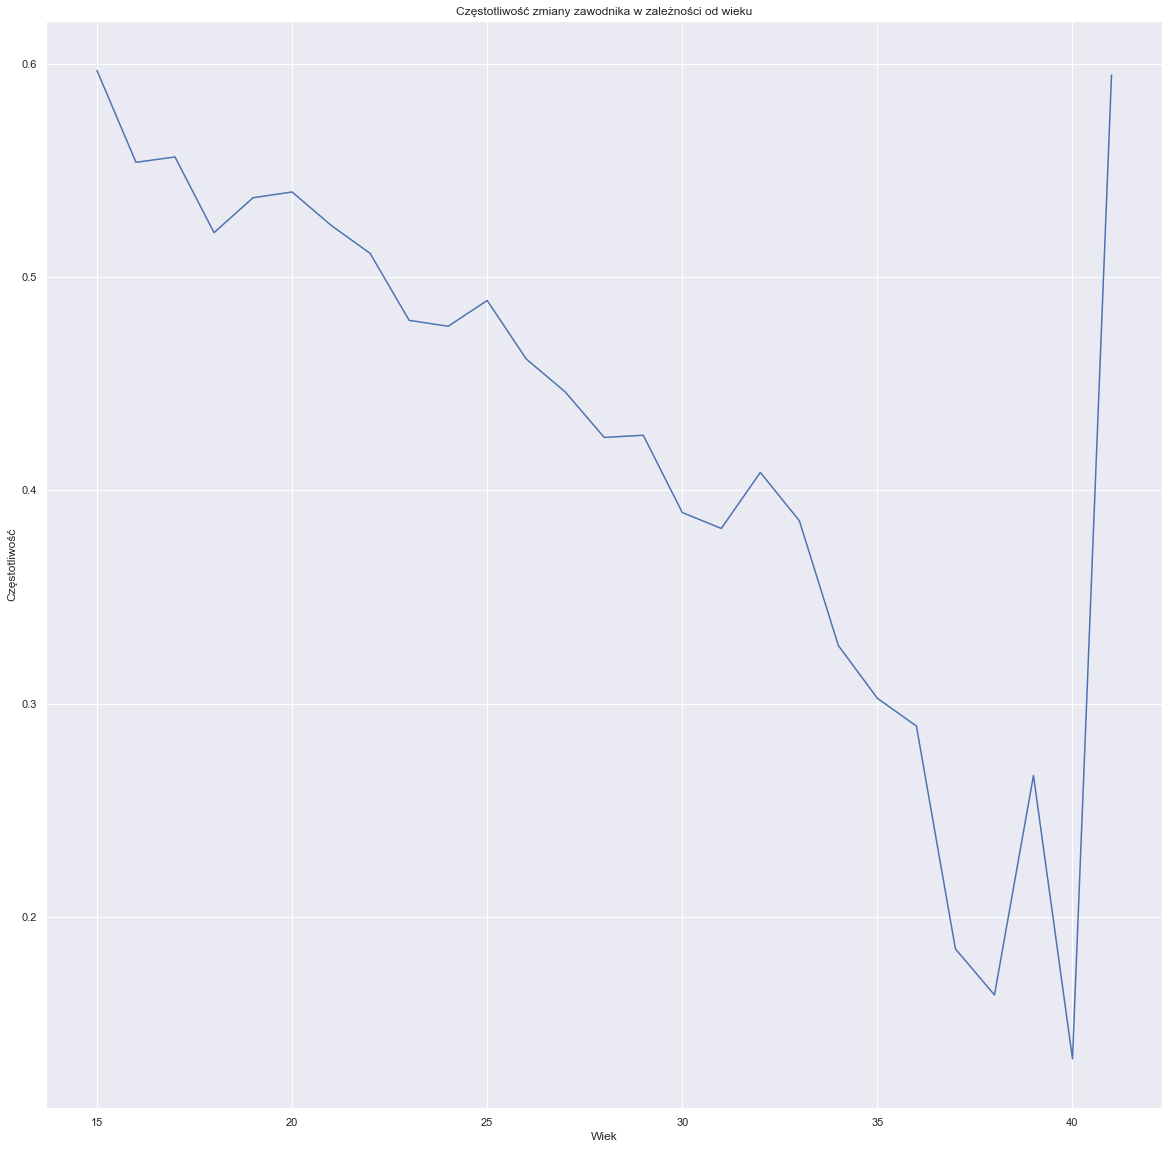

In [109]:
age_unique_list = list(set(transfer_df["PlayerAge"]))
substitutions = []
for age in age_unique_list:
    age_players = transfer_df[transfer_df["PlayerAge"] == age]
    substitution_ratio = [i / j if j != 0 else -1 for i, j in zip(age_players["PlayerSubstitutionIn"] + age_players["PlayerSubstitutionOut"], age_players["PlayerMatchesPlayed"])]
    substitution_ratio = [substitution for substitution in substitution_ratio if substitution >= 0]
    substitutions.append(statistics.mean(substitution_ratio))
plt.figure(figsize=(20,20))
plt.plot(age_unique_list,substitutions)
plt.xlabel('Wiek')
plt.ylabel('Częstotliwość')
plt.title('Częstotliwość zmiany zawodnika w zależności od wieku')
plt.savefig('plots/subs-frequence-by-player-age.png')

### Zakontraktowani zawodnicy z ostatnich trzech lat
***
Poniższy histogram przedstawia liczbę transferów wykonanych w przeciągu trzech ostatnich lat, z podziałem na określone miesiące roku. Jak widzimy, większość transferów wykonywana jest w miesiącach letnich, a także na samym początku roku (letnie i zimowe okienko transferowe)

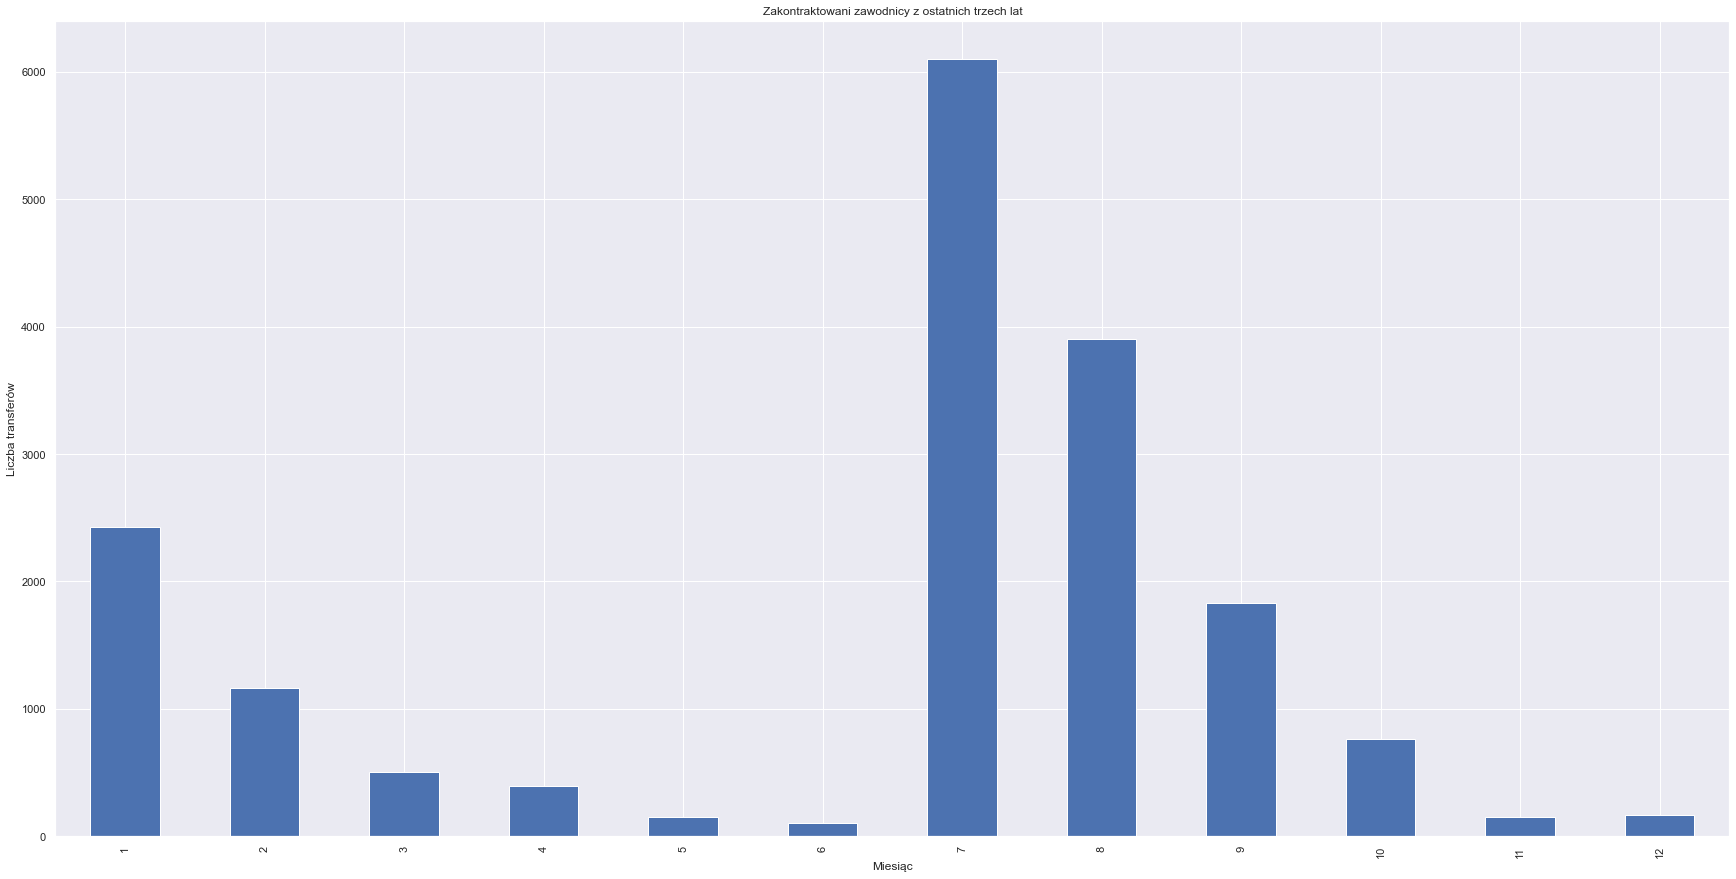

In [111]:
transfer_df['TransferDate'] = pd.to_datetime(transfer_df['TransferDate'])
transfer_df['TransferDate'].groupby(transfer_df['TransferDate'].dt.month).count().plot(kind="bar")
plt.xlabel('Miesiąc')
plt.ylabel('Liczba transferów')
plt.title('Zakontraktowani zawodnicy z ostatnich trzech lat')
plt.savefig('plots/transfers-by-month.png')

### Procent ogółu sprzedanych zawodników w zależności od narodowości ligi
***
Poniższy wykres przedstawia procentowy udział poszczególnych narodowości (lig z poszczególnych krajów) w sprzedaży zawodników. Sprzedaż dotyczy zarówno transferów wewnętrznych jak i międzynarodowych. Zauważyć możemy największą sprzedaż zawodników w ramach ligi węgierskiej, urugwajskich oraz belgijskiej

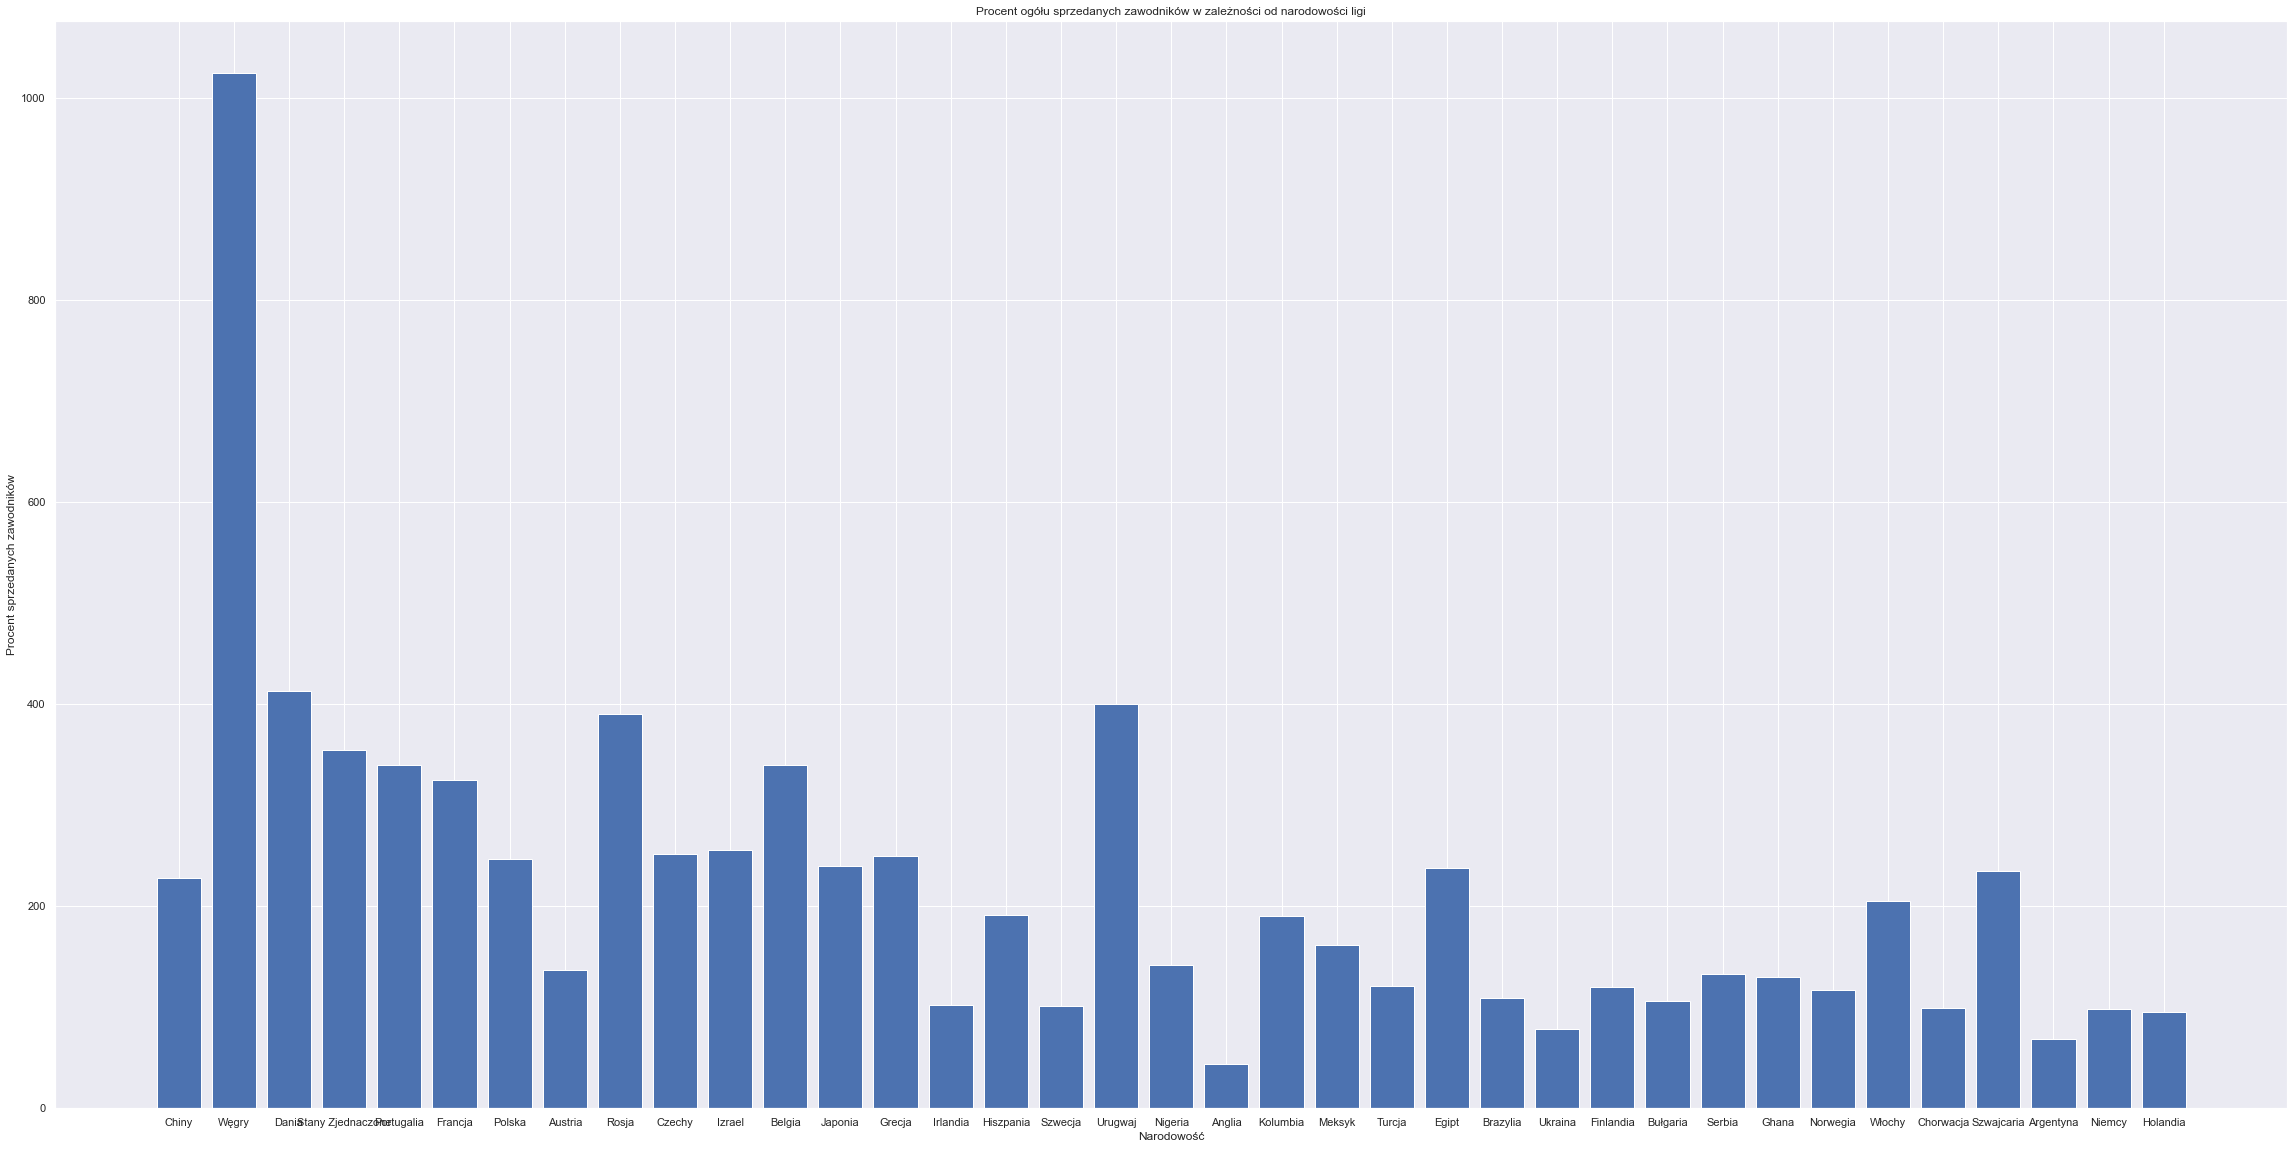

In [114]:
league_transfers_amount = []
for league in league_unique_list:
    league_transfers_amount.append(len(transfer_df.loc[
        (transfer_df["ClubAssignedLeagueNationality"] == league) & 
        (transfer_df["Bought/Sold"] == "Kupiony")]))
plt.figure(figsize=(40,20))
plt.bar(display_nationalities,league_transfers_amount)
plt.xlabel('Narodowość')
plt.ylabel('Procent sprzedanych zawodników')
plt.title('Procent ogółu sprzedanych zawodników w zależności od narodowości ligi')
plt.savefig('plots/sold-percent-by-nationality.png')

### TOP 20 zawodników najczęściej zmieniających kluby
***

In [117]:
def sort_values(val):
    return val[1]
transfers_counter = transfer_df["Player"].value_counts()
data_items = transfers_counter.items()
data_list = list(data_items)
data_list.sort(key=sort_values,reverse=True)
transfers_counter = pd.DataFrame(data_list)
display(transfers_counter.head(20))

,0,1
0,Rogério,13
1,Josef Bursik,13
2,Richard,11
3,Diego Rodríguez,11
4,Paul Smyth,10
5,Lucas Villarruel,9
6,Rafinha,9
7,Viktor Gyökeres,9
8,Lucca,9
9,Cristian Benavente,8


### Liczba strzelonych goli w zależności od wzrostu zawodnika
***
Poniższy wykres przedstawia zależność liczby zdobytych bramek od wzrostu transferowanego zawodnika. Jak możemy zauważyć, najwięcej bramek zdobywają zawodnicy o wzroście pomiędzy 180cm a 185cm.

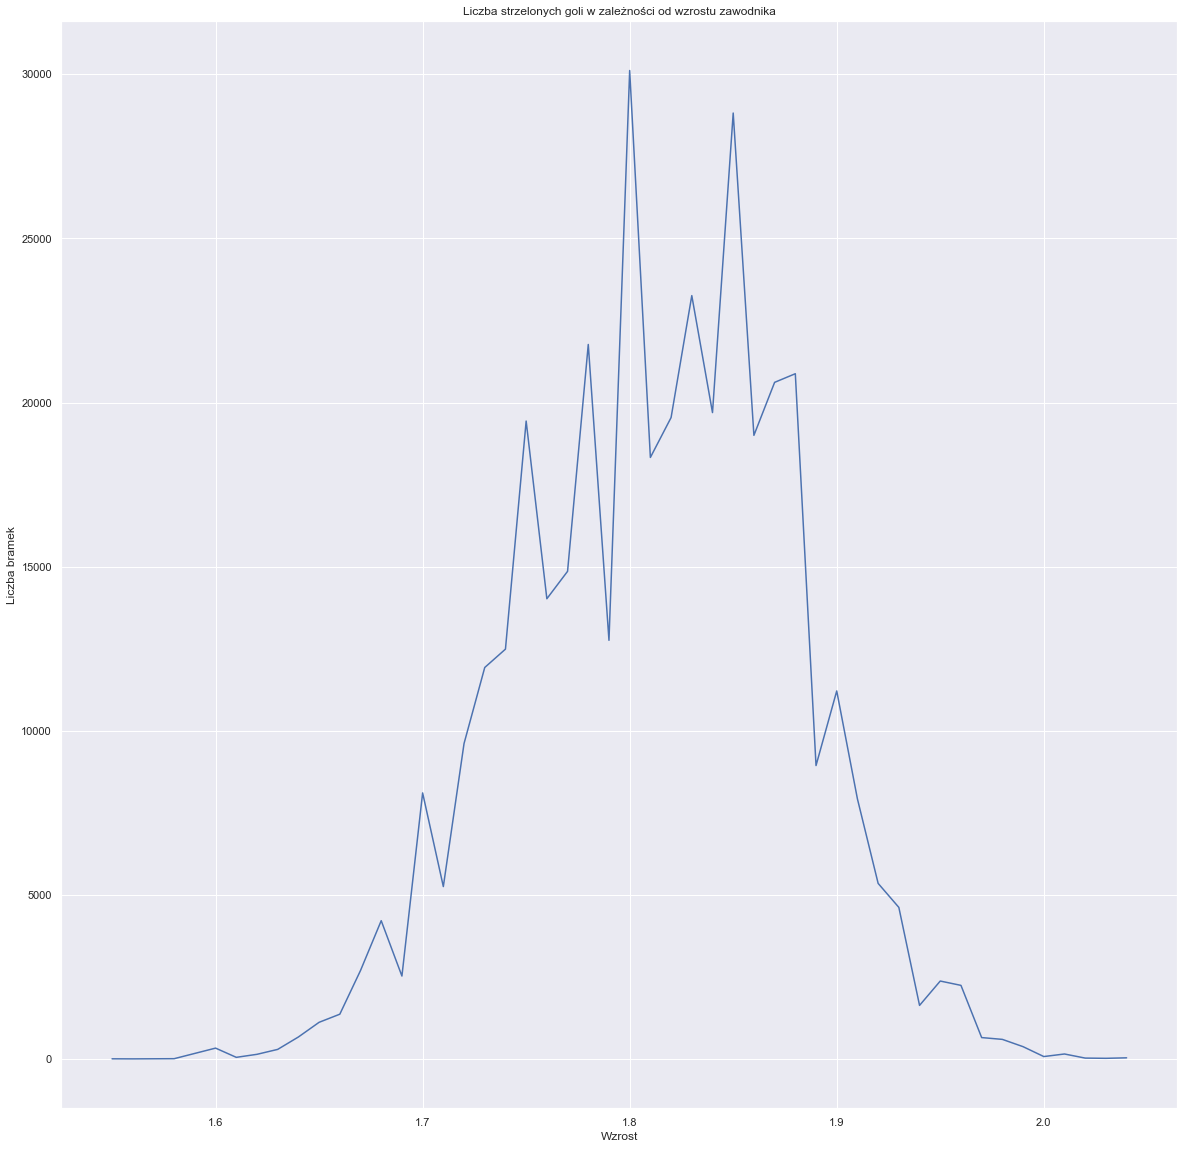

In [119]:
amout_of_goals = []
height_unique_list = []
for height in transfer_df["PlayerHeight"]:
    if height not in height_unique_list:
        height_unique_list.append(height)
height_unique_list.sort()
for height in height_unique_list:
        goals_sum = 0
        goals = transfer_df.loc[(transfer_df["PlayerHeight"] == height)]['PlayerGoals']
        for value in goals:
            converted_value = int(value)
            goals_sum= goals_sum + converted_value
        amout_of_goals.append(goals_sum)
plt.figure(figsize=(20,20))
plt.plot(height_unique_list,amout_of_goals)
plt.xlabel('Wzrost')
plt.ylabel('Liczba bramek')
plt.title('Liczba strzelonych goli w zależności od wzrostu zawodnika')
plt.savefig('plots/goals-by-height.png')

### Wartość rynkowa zawodnika w zależności od liczby zagranych meczów
***
Niniejszy wykres przedstawia wartość rynkową transferowanych zawodników, w zależności od liczby rozegranych przez nich meczów. Zgodnie z danymi wykresu, najdroźsi są zawodnicy, którzy odnotowali około 380 występów.

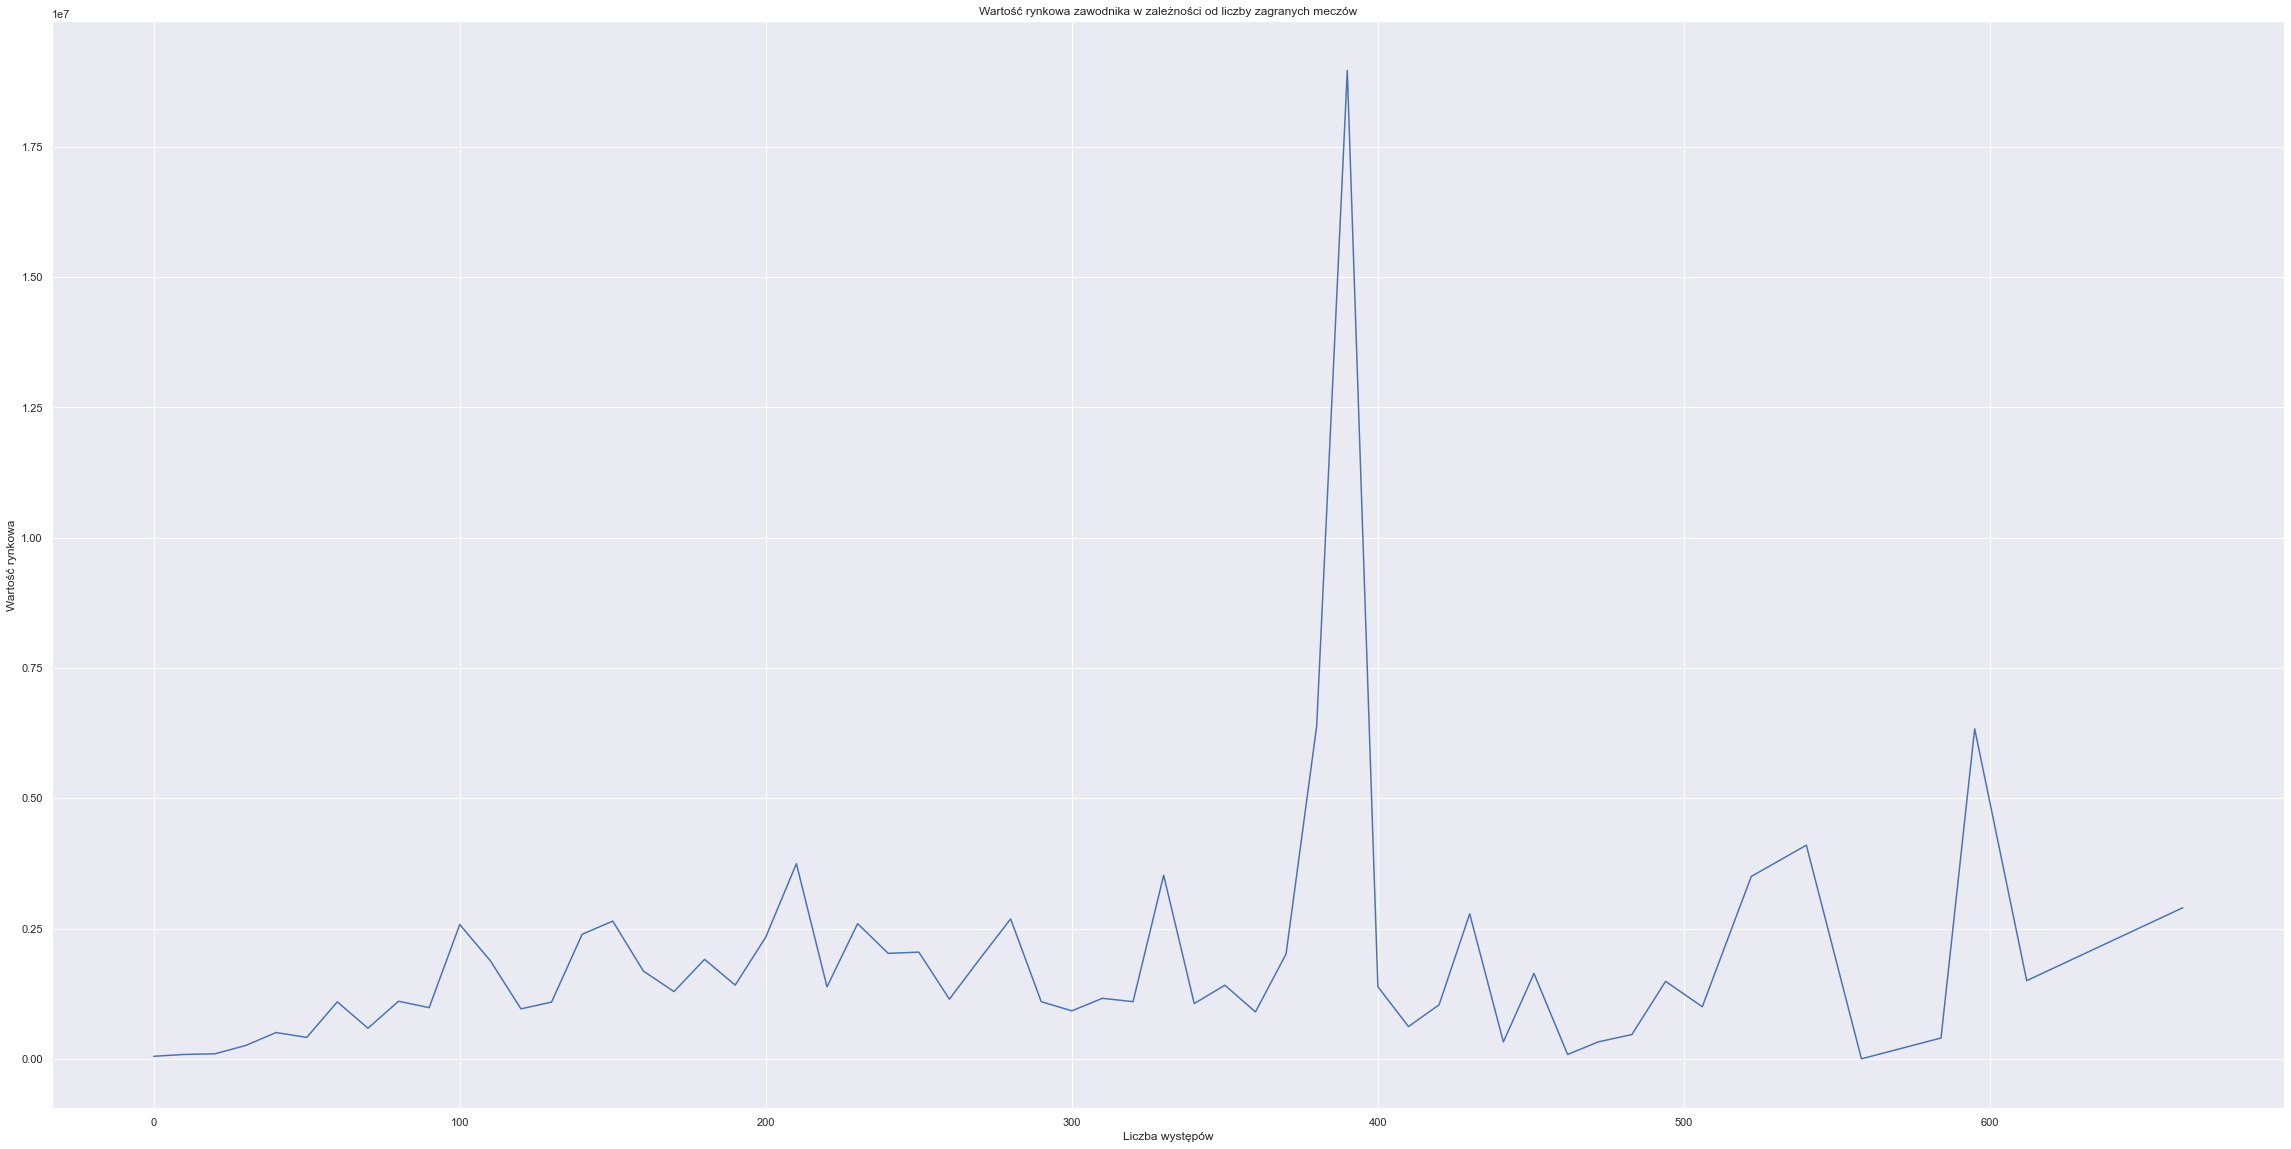

In [130]:
player_value_sum = []
games_played_unique_list = []
games_played = transfer_df['PlayerMatchesPlayed'].tolist()
games_played.sort()
for games in games_played:
    if games not in games_played_unique_list:
        games_played_unique_list.append(games)


for games in games_played_unique_list:
        value_sum = 0
        values = transfer_df.loc[(transfer_df["PlayerMatchesPlayed"] == games)]['PlayerMarketValue']
        for value in values:
            converted_value = int(value)
            value_sum= value_sum + converted_value
        player_value_sum.append(value_sum)
amount_of_players = []
for games in games_played_unique_list:
    players = transfer_df.loc[(transfer_df["PlayerMatchesPlayed"] == games)].count()[0]
    amount_of_players.append(players)
mean_value = [i / j for i, j in zip(player_value_sum, amount_of_players)]
    
x = mean_value[::10]
y = games_played_unique_list[::10]
max_market_value = x[y.index(max(y))]
plt.figure(figsize=(40,20))
plt.plot(y,x)
plt.xlabel('Liczba występów')
plt.ylabel('Wartość rynkowa')
plt.title('Wartość rynkowa zawodnika w zależności od liczby zagranych meczów')
plt.savefig('plots/value-by-matches-played.png')

### Mediana oraz średnia wartości rynkowych zawodników w zależności od wieku
***
Niniejszy wykres przedstawia mediany wartości rynkowych zawodników, z podziałem na określone grupy wiekowe. Jak można zauważyć, najwyższa mediana wartości rynkowych odpowiada grupie zawodników w przedziale pomiędzy 25 a 30 lat.
Kolejny z wykresów, prezentuje analogiczne dane dla wartości średnich.

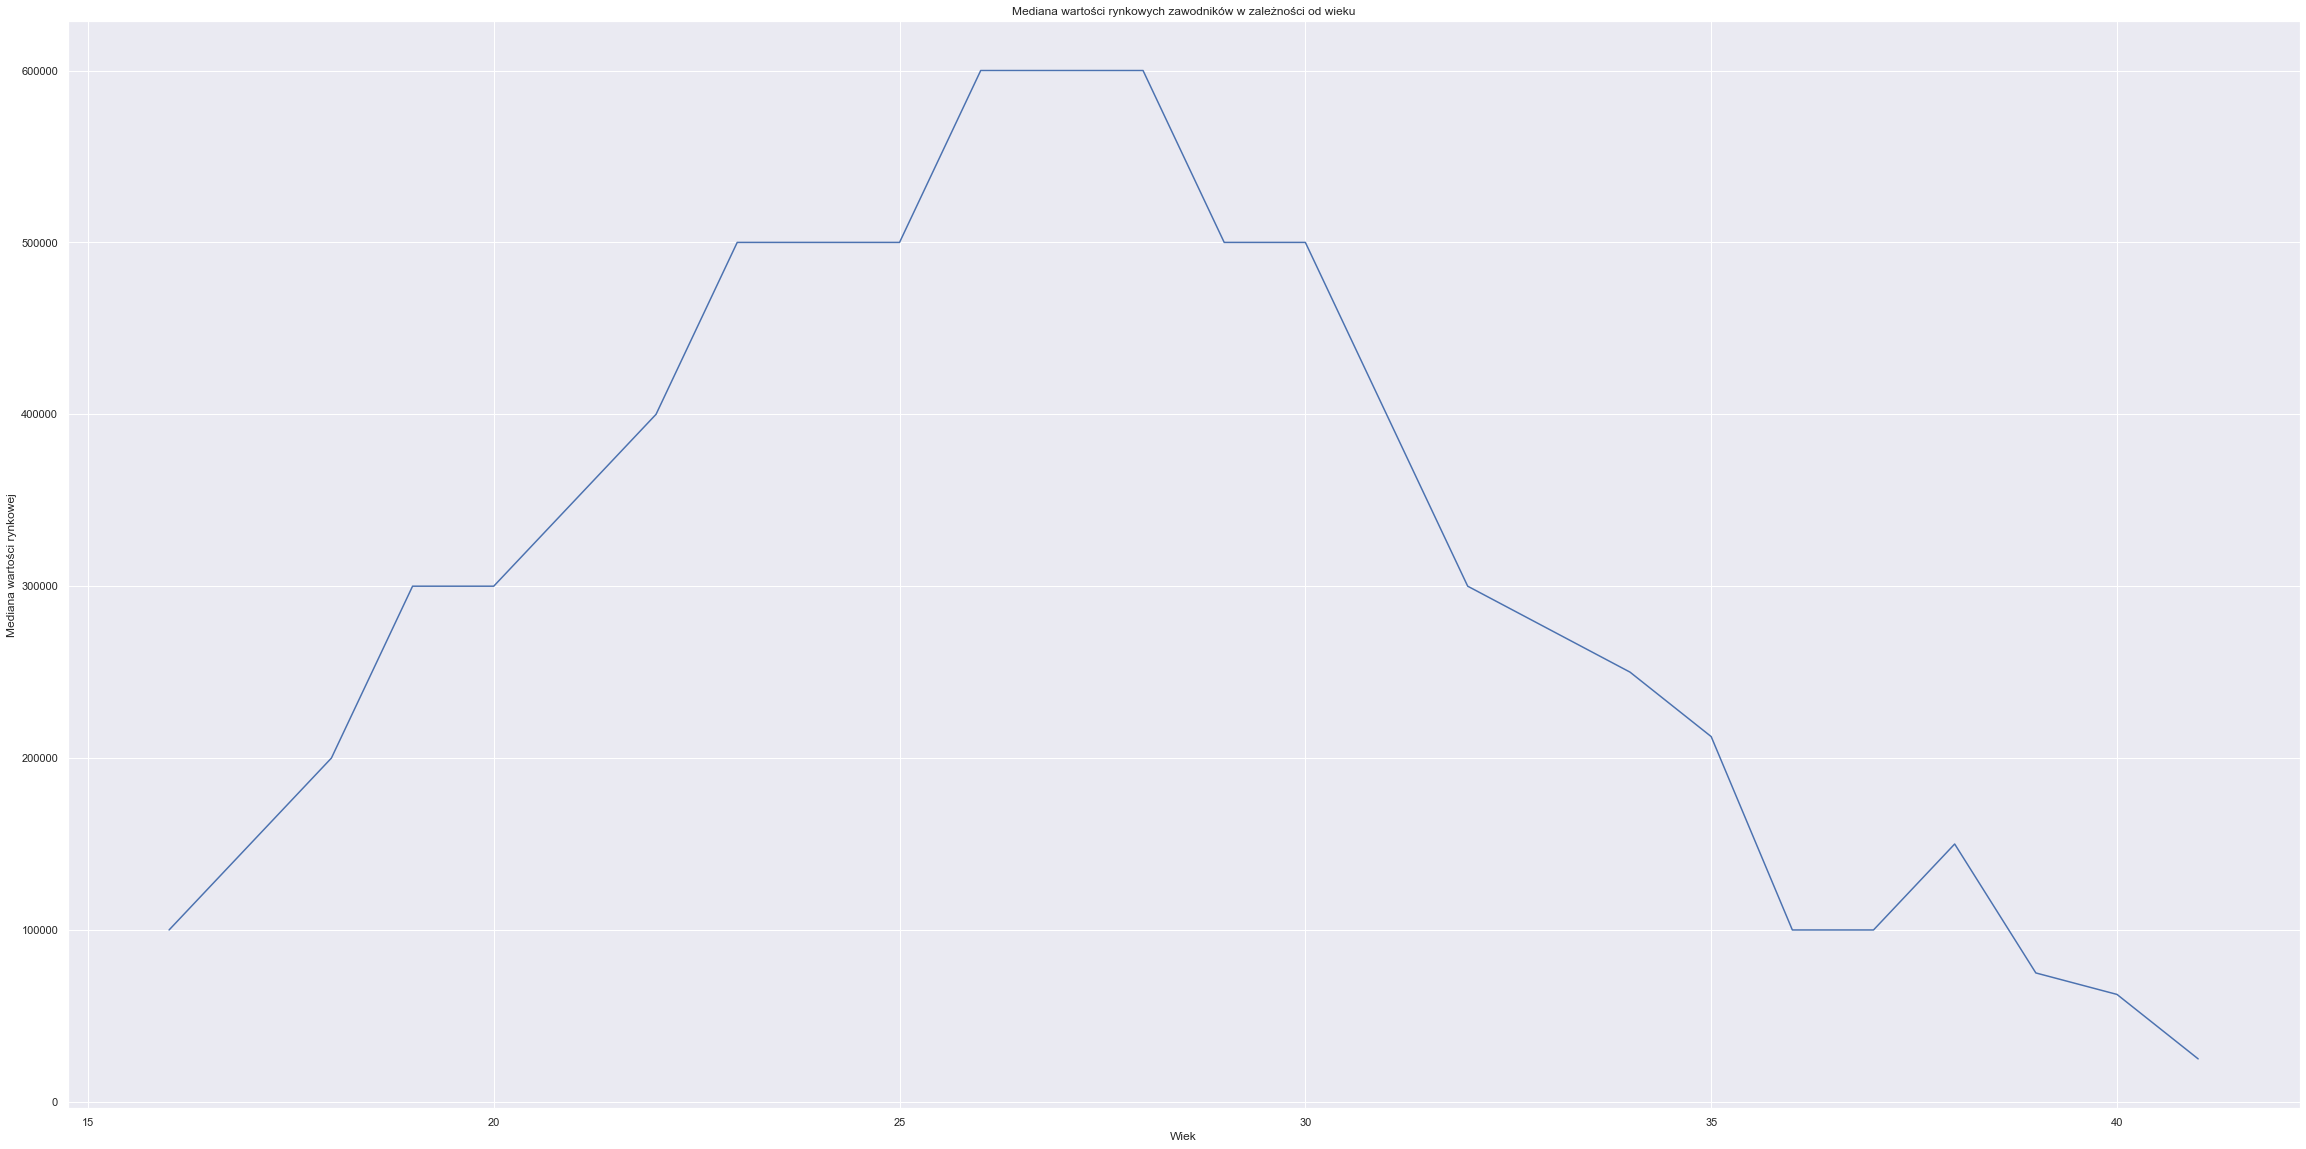

In [132]:
player_value_sum = []
age_unique_list = []
player_ages = transfer_df['PlayerAge'].tolist()

player_ages.sort()
for age in player_ages:
    if age not in age_unique_list and age > 15:
        age_unique_list.append(age)
for age in age_unique_list:
        value_sum = 0
        values = transfer_df.loc[(transfer_df["PlayerAge"] == age)]['PlayerMarketValue']
        player_value_sum.append(statistics.median(values))


plt.figure(figsize=(40,20))
plt.plot(age_unique_list,player_value_sum)
plt.xlabel('Wiek')
plt.ylabel('Mediana wartości rynkowej')
plt.title('Mediana wartości rynkowych zawodników w zależności od wieku')
plt.savefig('plots/value-median-by-age.png')

Wartość rynkowa zawodnika w zależności od wieku (średnia wartość)

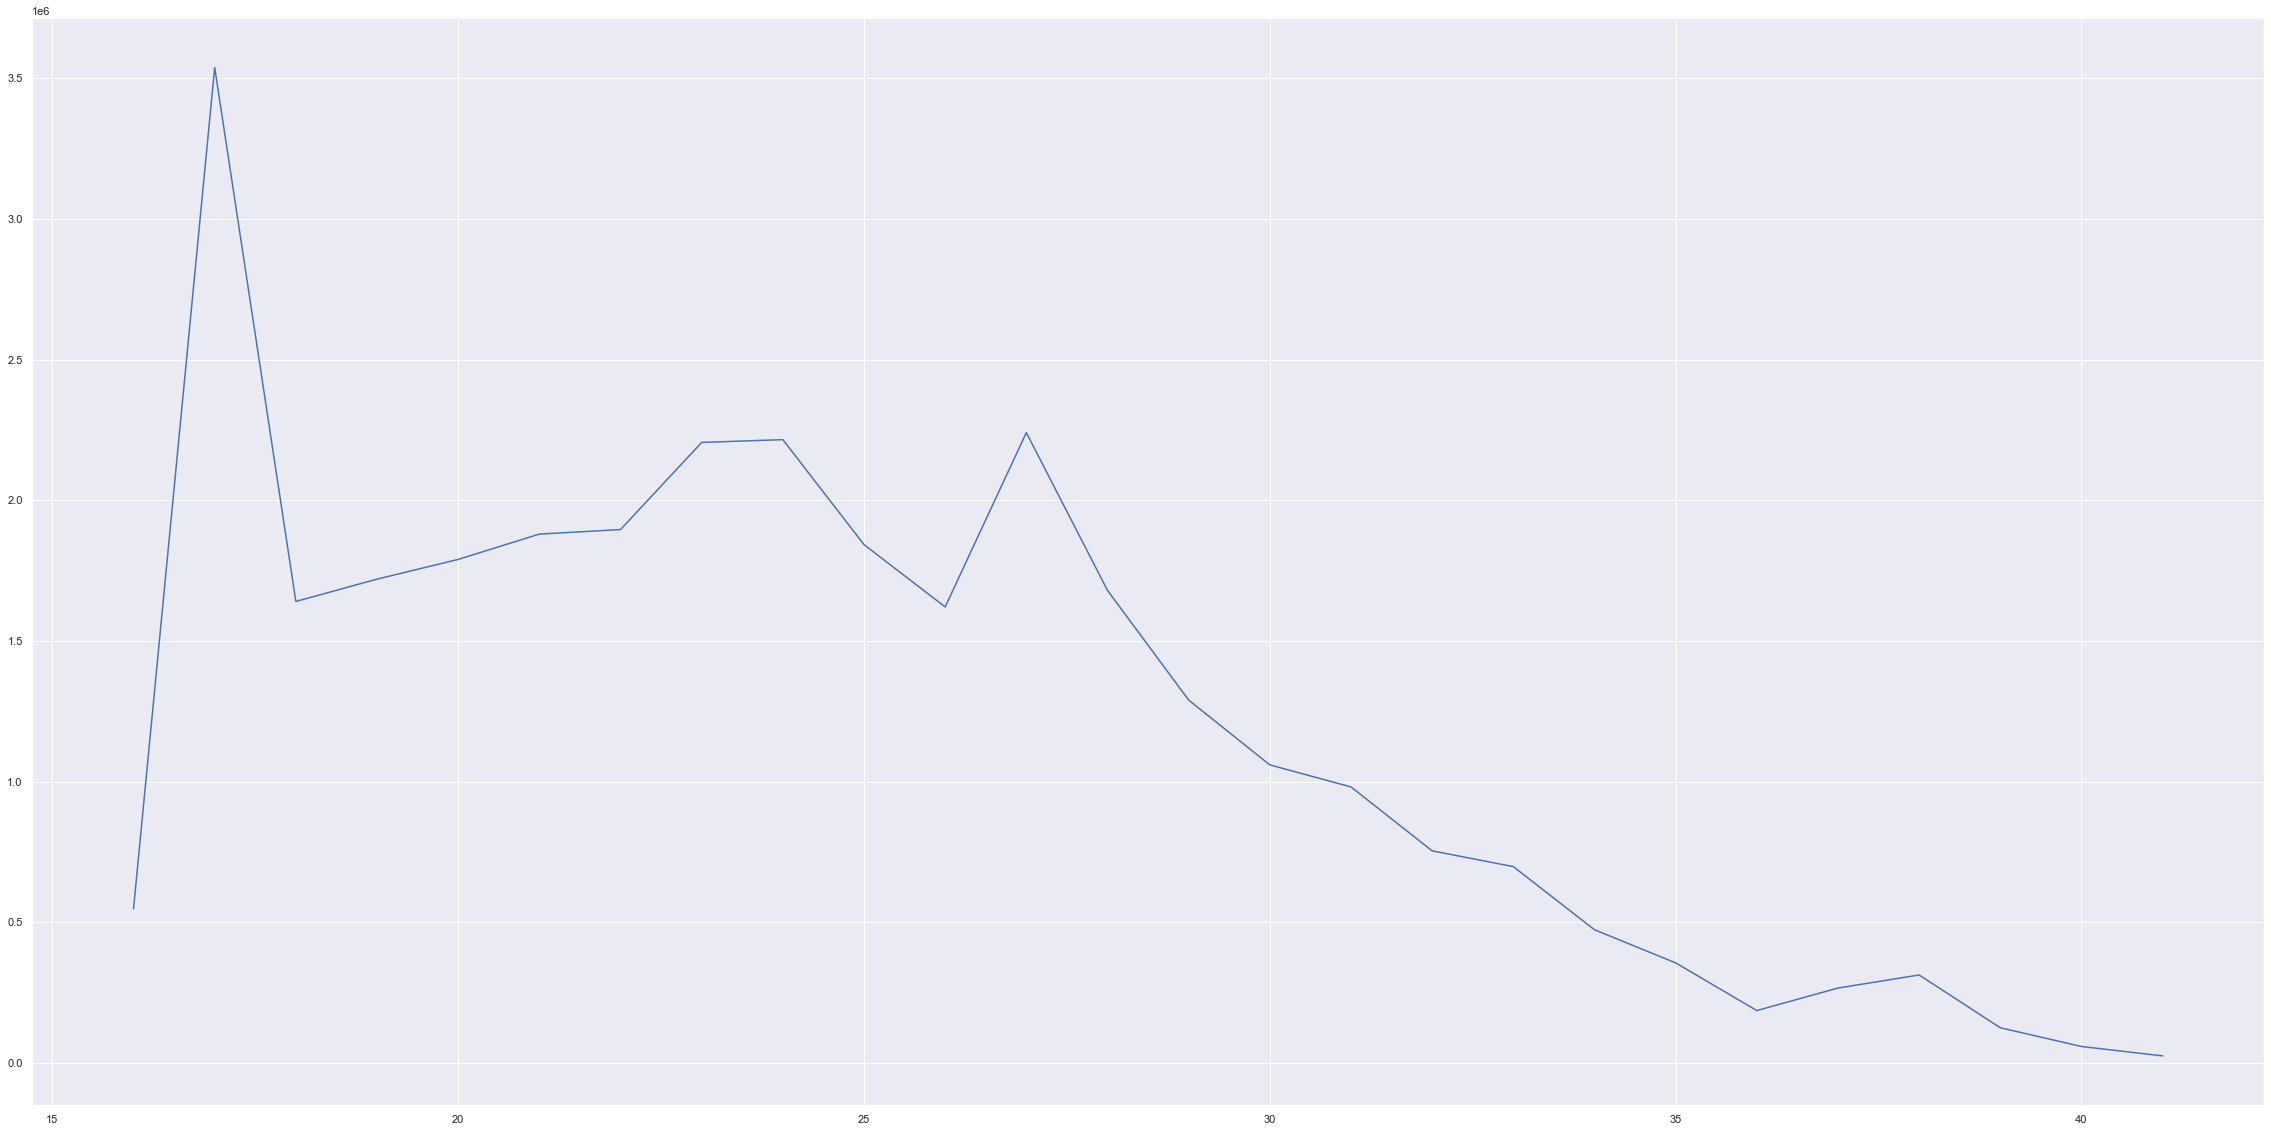

In [134]:
player_value_sum = []
age_unique_list = []
player_ages = transfer_df['PlayerAge'].tolist()

player_ages.sort()
for age in player_ages:
    if age not in age_unique_list and age > 15:
        age_unique_list.append(age)

for age in age_unique_list:
        value_sum = 0
        values = transfer_df.loc[(transfer_df["PlayerAge"] == age)]['PlayerMarketValue']
        for value in values:
            converted_value = int(value)
            value_sum= value_sum + converted_value
        player_value_sum.append(value_sum)

amount_of_players = []
for age in age_unique_list:
    players = transfer_df.loc[(transfer_df["PlayerAge"] == age)].count()[0]
    amount_of_players.append(players)
mean_value = [i / j for i, j in zip(player_value_sum, amount_of_players)]
plt.figure(figsize=(40,20))
plt.plot(age_unique_list,mean_value)

### Procent strzelonych goli w zależności od wieku oraz ligi
***
Wykresy przedstawiają zależność procentu wszystkich zdobytych bramek w od wieku zawodnika, a także ligi w której gra. Wywnioskować możemy między innymi, że najbardziej bramkostrzelnymi transferowanymi zawodnikami są Ci, którzy mają 26, 27 oraz 29 lat. Ponadto, w lidze katarskiej najwięcej bramek zdobywają zawodnicy w wieku 30 lat.

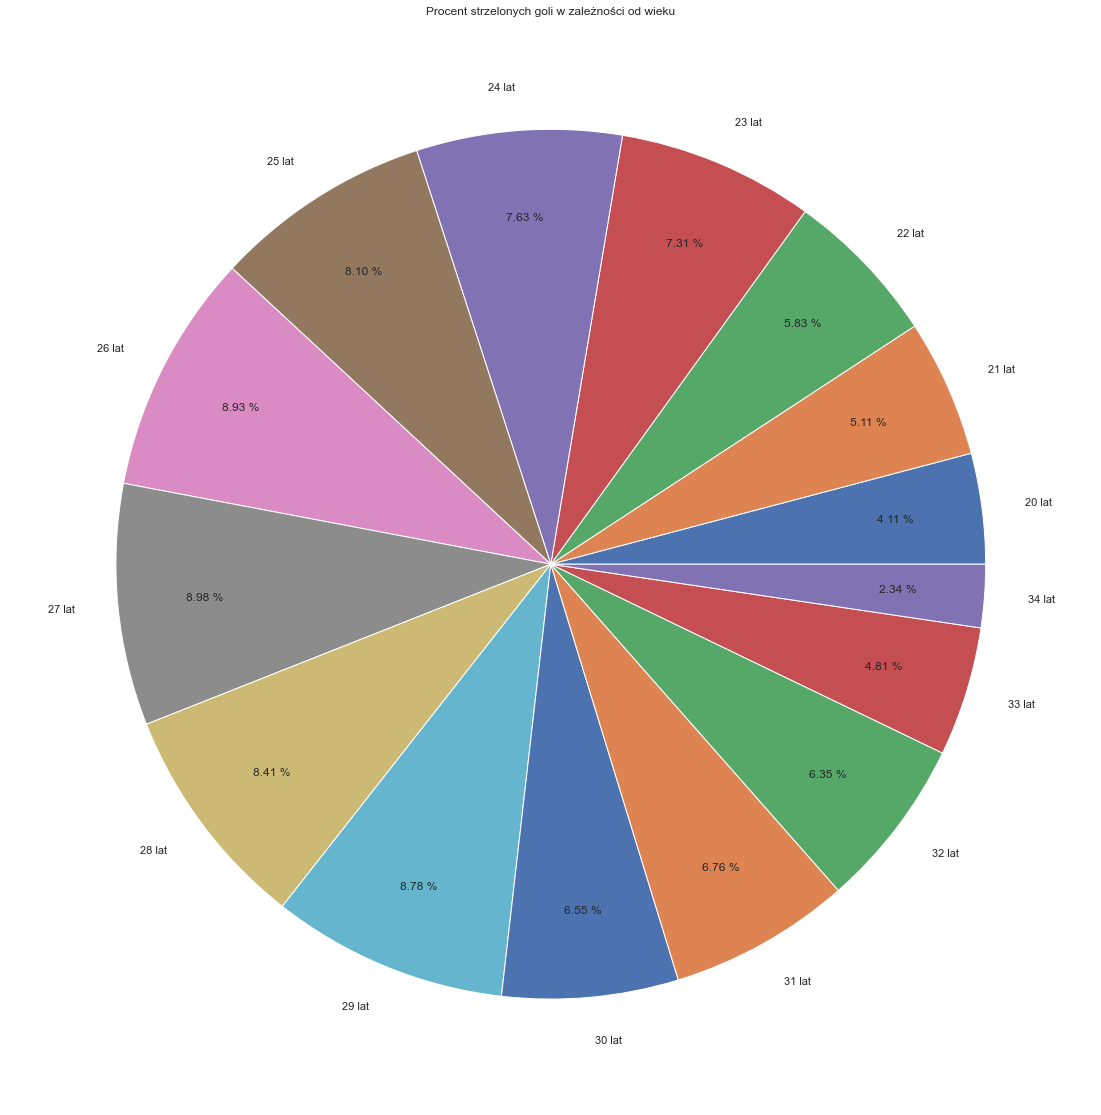

In [141]:
amout_of_goals = []
age_unique_list = []
for x in range(20, 35):
    age_unique_list.append(x)

for age in age_unique_list:
    goals = transfer_df.loc[(transfer_df['PlayerAge'] == age)]['PlayerGoals']
    goals_sum = 0
    for value in goals:
        converted_value = int(value)
        goals_sum= goals_sum + converted_value
    amout_of_goals.append(goals_sum)

plt.figure(figsize=(20,20))

labeled_age_unique_list = [str(age)+" lat" for age in age_unique_list]

plt.pie(amout_of_goals, labels=labeled_age_unique_list, autopct='%.2f %%', pctdistance=0.8)
plt.title('Procent strzelonych goli w zależności od wieku')
plt.savefig('plots/goals-percent-by-age.png')
plt.show()

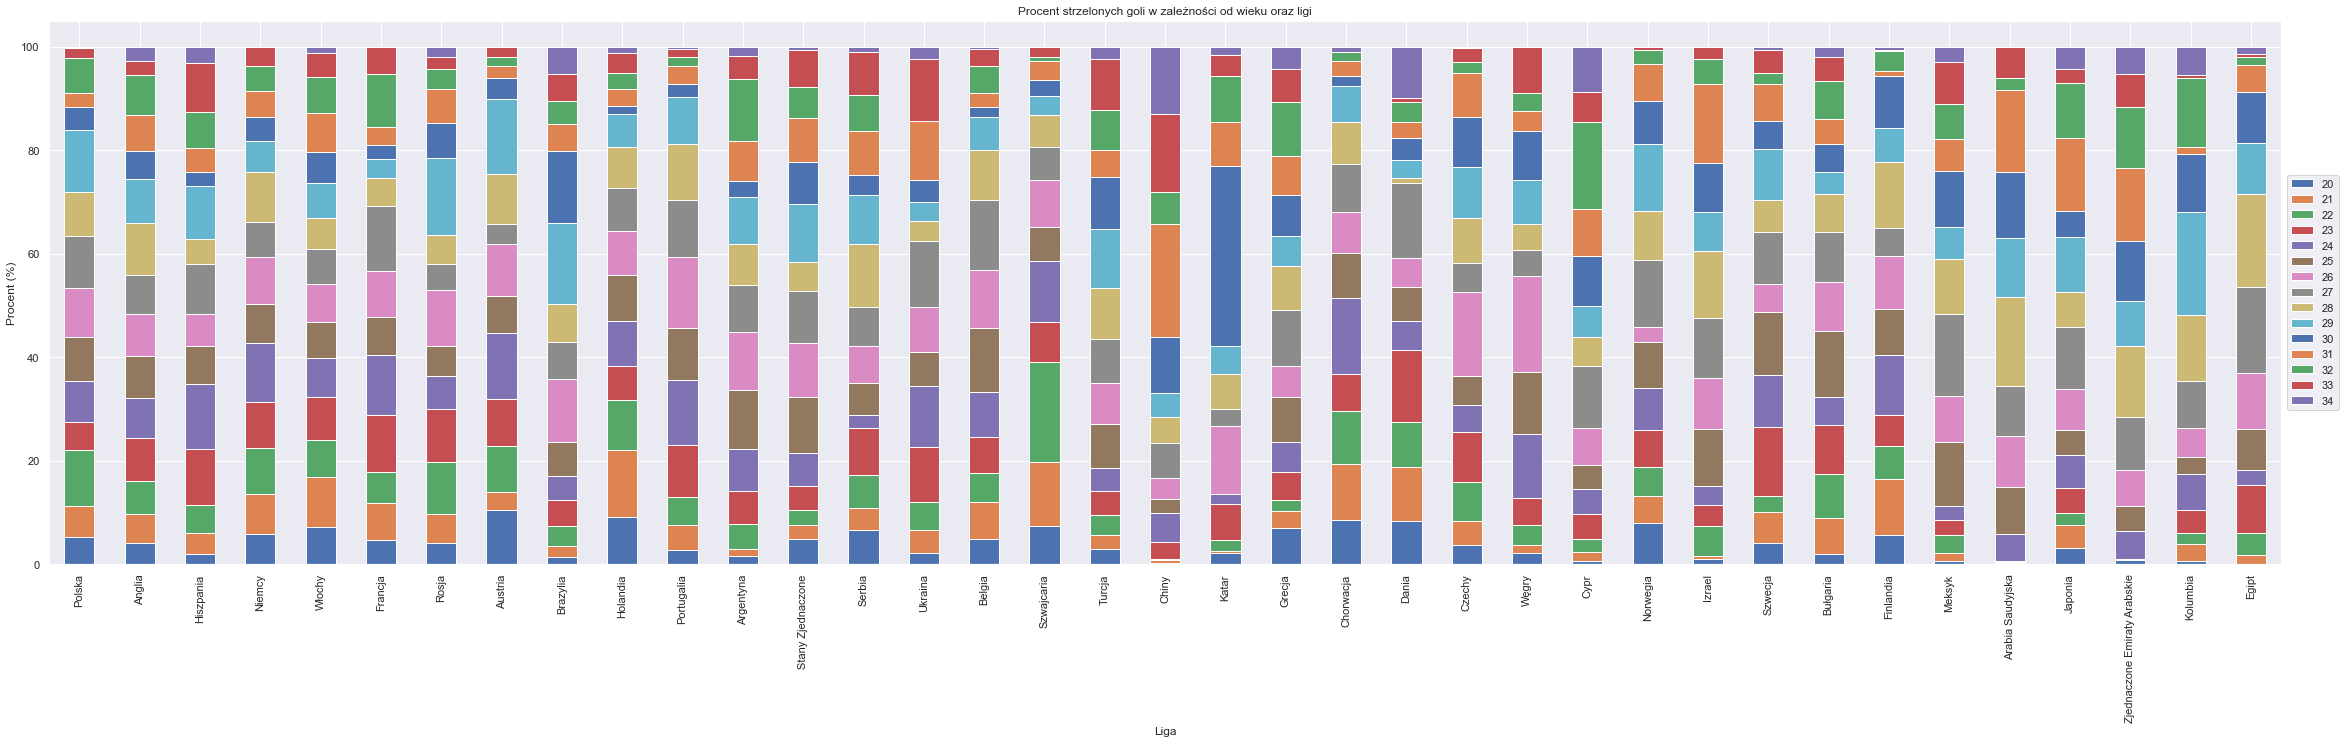

In [144]:
listNumberOfGoals = []
for league in league_unique_list:
    amout_of_goals = []
    for age in age_unique_list:
        goals_sum = 0
        goals = transfer_df.loc[(transfer_df["PlayerAge"] == age) & (transfer_df["ClubLeagueNationality"] == league)]['PlayerGoals']
        for value in goals:
            converted_value = int(value)
            goals_sum= goals_sum + converted_value
        amout_of_goals.append(goals_sum)
    listNumberOfGoals.append(amout_of_goals)
df = pd.DataFrame(columns=age_unique_list, data=listNumberOfGoals, index=league_unique_list)
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(40,10) )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Liga')
plt.ylabel('Procent (%)')
plt.title('Procent strzelonych goli w zależności od wieku oraz ligi')
plt.savefig('plots/value-median-by-age-by-league.png')

### Liczba czerwonych kartek w zależności od ligi
***
Niniejszy wykres przedstawia zależność liczby zdobytych przez zawodników czerwonych kartek od ligi w której grają. Najwięcej czerwonych kartek dostają zawodnicy w lidze kolumbijskiej, portugalskiej oraz hiszpańskiej. Najczyściej z kolei, grają zawodnicy ligi japońskiej oraz norweskiej

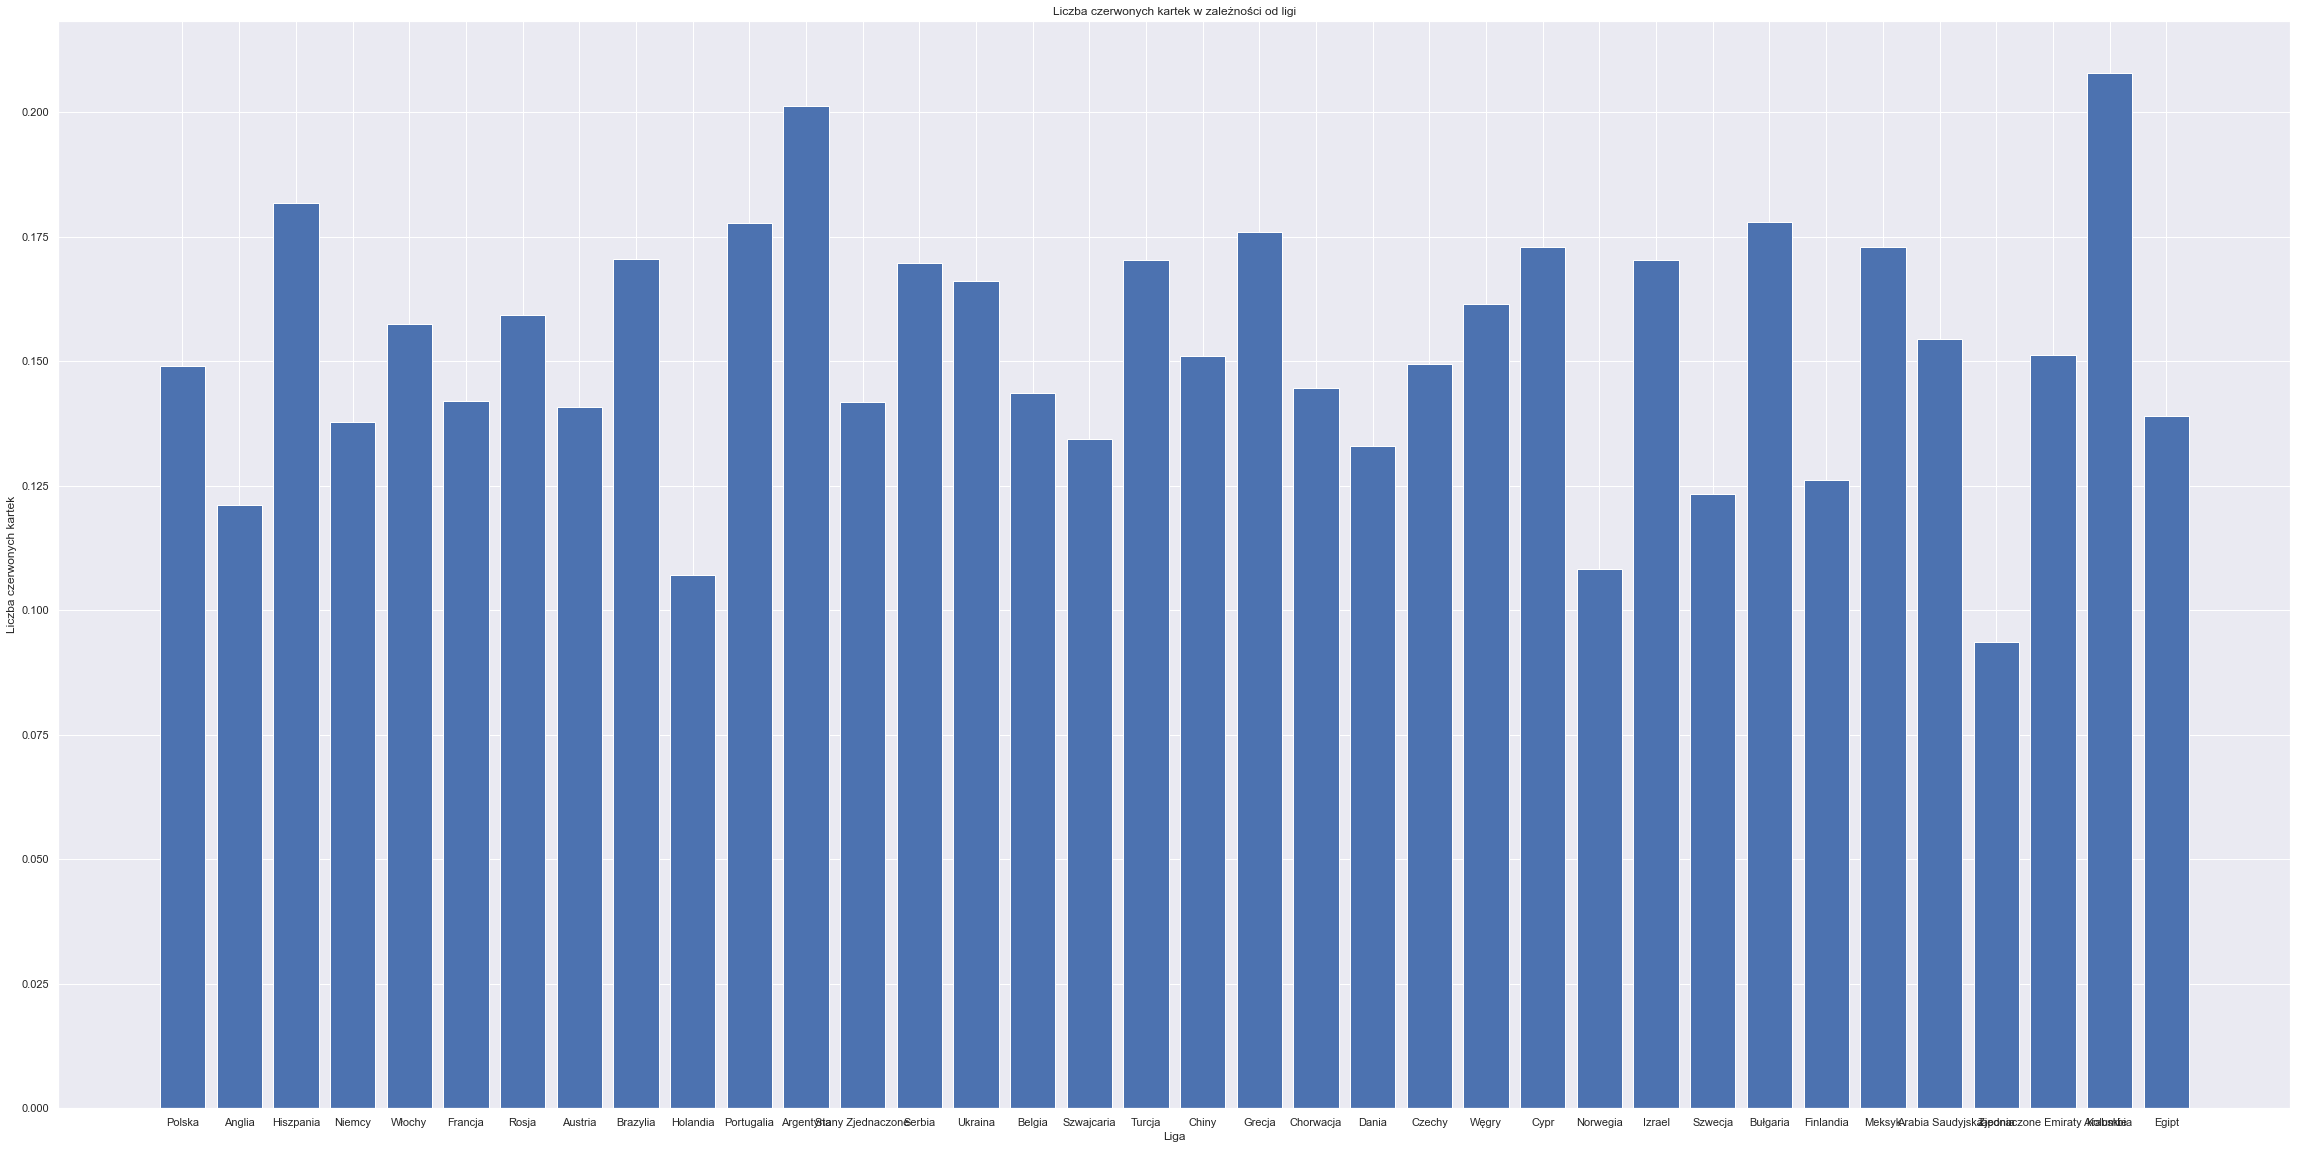

In [146]:
league_unique_list = []
for league in transfer_df["ClubLeagueNationality"]:
    if league not in league_unique_list:
        league_unique_list.append(league)
league_cards_per_match = []
display_leagues = []
for league in league_unique_list:
    league_players = transfer_df[transfer_df["ClubLeagueNationality"] == league]
    cards_ratio = [i / j if j > 100 else -1 for i, j in zip(league_players["PlayerYellowCards"] + league_players["PlayerSecondYellowCards"] + 3*league_players["PlayerRedCards"], league_players["PlayerMatchesPlayed"])]
    cards_ratio = [card_ratio for card_ratio in cards_ratio if card_ratio >= 0]
    if(len(cards_ratio) >= 100):
        display_leagues.append(league)
        league_cards_per_match.append(statistics.mean(cards_ratio))
plt.figure(figsize=(40,20))
plt.bar(display_leagues,league_cards_per_match)
plt.xlabel('Liga')
plt.ylabel('Liczba czerwonych kartek')
plt.title('Liczba czerwonych kartek w zależności od ligi')
plt.savefig('plots/red-cards-by-league.png')